In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### TASK 1

In [2]:
dataframe = pd.read_excel("default_of_credit_card_clients.xls")

In [3]:
dataframe.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
dataframe.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [5]:
dataframe.shape

(30000, 25)

In [6]:
dataframe['ID'].nunique()

29687

In [7]:
dataframe.shape[0]-dataframe['ID'].nunique()

313

In [8]:
counts = dataframe['ID'].value_counts()
counts.head()

fa286931-8ded    2
0913d642-c5d4    2
73ea498f-44b2    2
ea8d41fd-b8a3    2
cd944abe-cef9    2
Name: ID, dtype: int64

In [9]:
counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

In [10]:
np.random.seed(seed=24)

In [11]:
dupe_mask = counts == 2
dupe_mask[0:10]

fa286931-8ded    True
0913d642-c5d4    True
73ea498f-44b2    True
ea8d41fd-b8a3    True
cd944abe-cef9    True
9878723a-0b58    True
04c32736-903c    True
693a0664-bde6    True
69566a6b-6156    True
90f662f9-c1e3    True
Name: ID, dtype: bool

In [12]:
counts.index[0:10]

Index(['fa286931-8ded', '0913d642-c5d4', '73ea498f-44b2', 'ea8d41fd-b8a3',
       'cd944abe-cef9', '9878723a-0b58', '04c32736-903c', '693a0664-bde6',
       '69566a6b-6156', '90f662f9-c1e3'],
      dtype='object')

In [13]:
dupe_ids = counts.index[dupe_mask]

In [14]:
dupe_ids

Index(['fa286931-8ded', '0913d642-c5d4', '73ea498f-44b2', 'ea8d41fd-b8a3',
       'cd944abe-cef9', '9878723a-0b58', '04c32736-903c', '693a0664-bde6',
       '69566a6b-6156', '90f662f9-c1e3',
       ...
       'a7559852-f405', '2a8ad33f-fa9c', '63b20368-1a04', '2a8713e6-0f03',
       '9ac5d94f-ed71', '999b7824-373c', '0ad143f2-bd95', 'f0bb9e5a-eb11',
       '659da309-053c', 'e50d8395-da32'],
      dtype='object', length=313)

In [15]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [16]:
dupe_ids

['fa286931-8ded',
 '0913d642-c5d4',
 '73ea498f-44b2',
 'ea8d41fd-b8a3',
 'cd944abe-cef9',
 '9878723a-0b58',
 '04c32736-903c',
 '693a0664-bde6',
 '69566a6b-6156',
 '90f662f9-c1e3',
 '9c53fb07-9b73',
 'dbf9fb14-2656',
 'd9dafe9c-b497',
 'f5e3478e-cf68',
 '56945919-0933',
 'e77f7765-8731',
 '47d9ee33-0df0',
 'cfa9d026-de0d',
 '3327c2a8-3402',
 'e8ee55be-0a11',
 '998fa9b2-b341',
 '0a5048ae-e120',
 'ffb9a143-c375',
 '3fddeb07-b7f0',
 '2458b96d-e8f1',
 'c84dd06b-71f5',
 '01355f46-3f0b',
 'b3c9d09b-ed59',
 '62608fd2-d7fb',
 '1fb3e3e6-a68d',
 '1a055566-c187',
 'df3d13be-9c13',
 '7fe414ae-32f8',
 '443324fb-5cfc',
 'e8bcb1bb-456e',
 '590a776e-5049',
 '33bf169b-258a',
 '59387843-6db1',
 '91321f74-e4a4',
 'c361e43d-f1f4',
 '9e6e766d-ba75',
 '062f1fe4-9a66',
 '1c7af562-f271',
 'db91a87c-3cbe',
 '25a28c93-508a',
 'ffa0f012-3bd7',
 '40e75290-0f59',
 'f9bcd13e-96bc',
 '369e565a-26a1',
 '63338f74-01be',
 'dda76366-a407',
 '3d832783-1571',
 'b44b81b2-7789',
 '86477d4e-795e',
 '994330b6-eeec',
 'edd737fd

In [17]:
dataframe.loc[dataframe['ID'].isin(dupe_ids[0:3]),:].head(10) 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
3859,73ea498f-44b2,20000,2,1,1,32,2,2,2,2,...,11653,7833,7945,6000,0,744,0,620,0,1
3959,73ea498f-44b2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13513,0913d642-c5d4,240000,2,3,2,36,0,0,0,0,...,194976,197168,196918,9000,7500,7000,6622,17150,20000,1
13613,0913d642-c5d4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25852,fa286931-8ded,370000,2,2,1,47,-2,-2,-2,-2,...,12074,744,4040,2432,397,12133,747,4060,3059,0
25952,fa286931-8ded,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_zero_mask = dataframe == 0

In [19]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [20]:
sum(feature_zero_mask)

315

In [21]:
df_clean_1 = dataframe.loc[~feature_zero_mask,:].copy()

In [22]:
df_clean_1.shape

(29685, 25)

In [23]:
df_clean_1['ID'].nunique()

29685

In [24]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [25]:
df_clean_1['PAY_1'].tail(20)

29980                0
29981                1
29982                0
29983               -2
29984    Not available
29985               -2
29986               -1
29987                0
29988                0
29989               -1
29990                0
29991                3
29992                0
29993                0
29994                2
29995                0
29996               -1
29997                4
29998                1
29999                0
Name: PAY_1, dtype: object

In [26]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [27]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [28]:
sum(valid_pay_1_mask)

26664

In [29]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [30]:
df_clean_2.tail(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29979,239a1d2e-f4f4,180000,1,1,1,32,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29980,2623fe20-6010,50000,1,3,2,42,0,0,0,0,...,50360,19971,19694,10000,4000,5000,3000,4500,2000,0
29981,af84788c-4c27,50000,1,2,1,44,1,2,2,2,...,28192,22676,14647,2300,1700,0,517,503,585,0
29982,207df2a7-7dd6,90000,1,2,1,36,0,0,0,0,...,11328,12036,14329,1500,1500,1500,1200,2500,0,1
29983,429d2c82-67ae,20000,1,2,1,44,-2,-2,-2,-2,...,2882,9235,1719,2890,2720,2890,9263,1824,1701,0
29985,71ccca61-6306,240000,1,1,2,30,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29986,39b25a8c-193b,360000,1,1,2,35,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29987,aaf9f747-0646,130000,1,1,2,34,0,0,0,0,...,108047,93708,97353,3000,2000,93000,4000,5027,4005,0
29988,ef8a4bcd-79f3,250000,1,1,1,34,0,0,0,0,...,245750,175005,179687,65000,8800,9011,6000,7000,6009,0
29989,87388419-6a89,150000,1,1,2,35,-1,-1,-1,-1,...,780,0,0,9054,0,783,0,0,0,0


In [31]:
df_clean_2.shape

(26664, 25)

In [32]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [33]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


In [34]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000258A14591D0>,
      dtype=object)

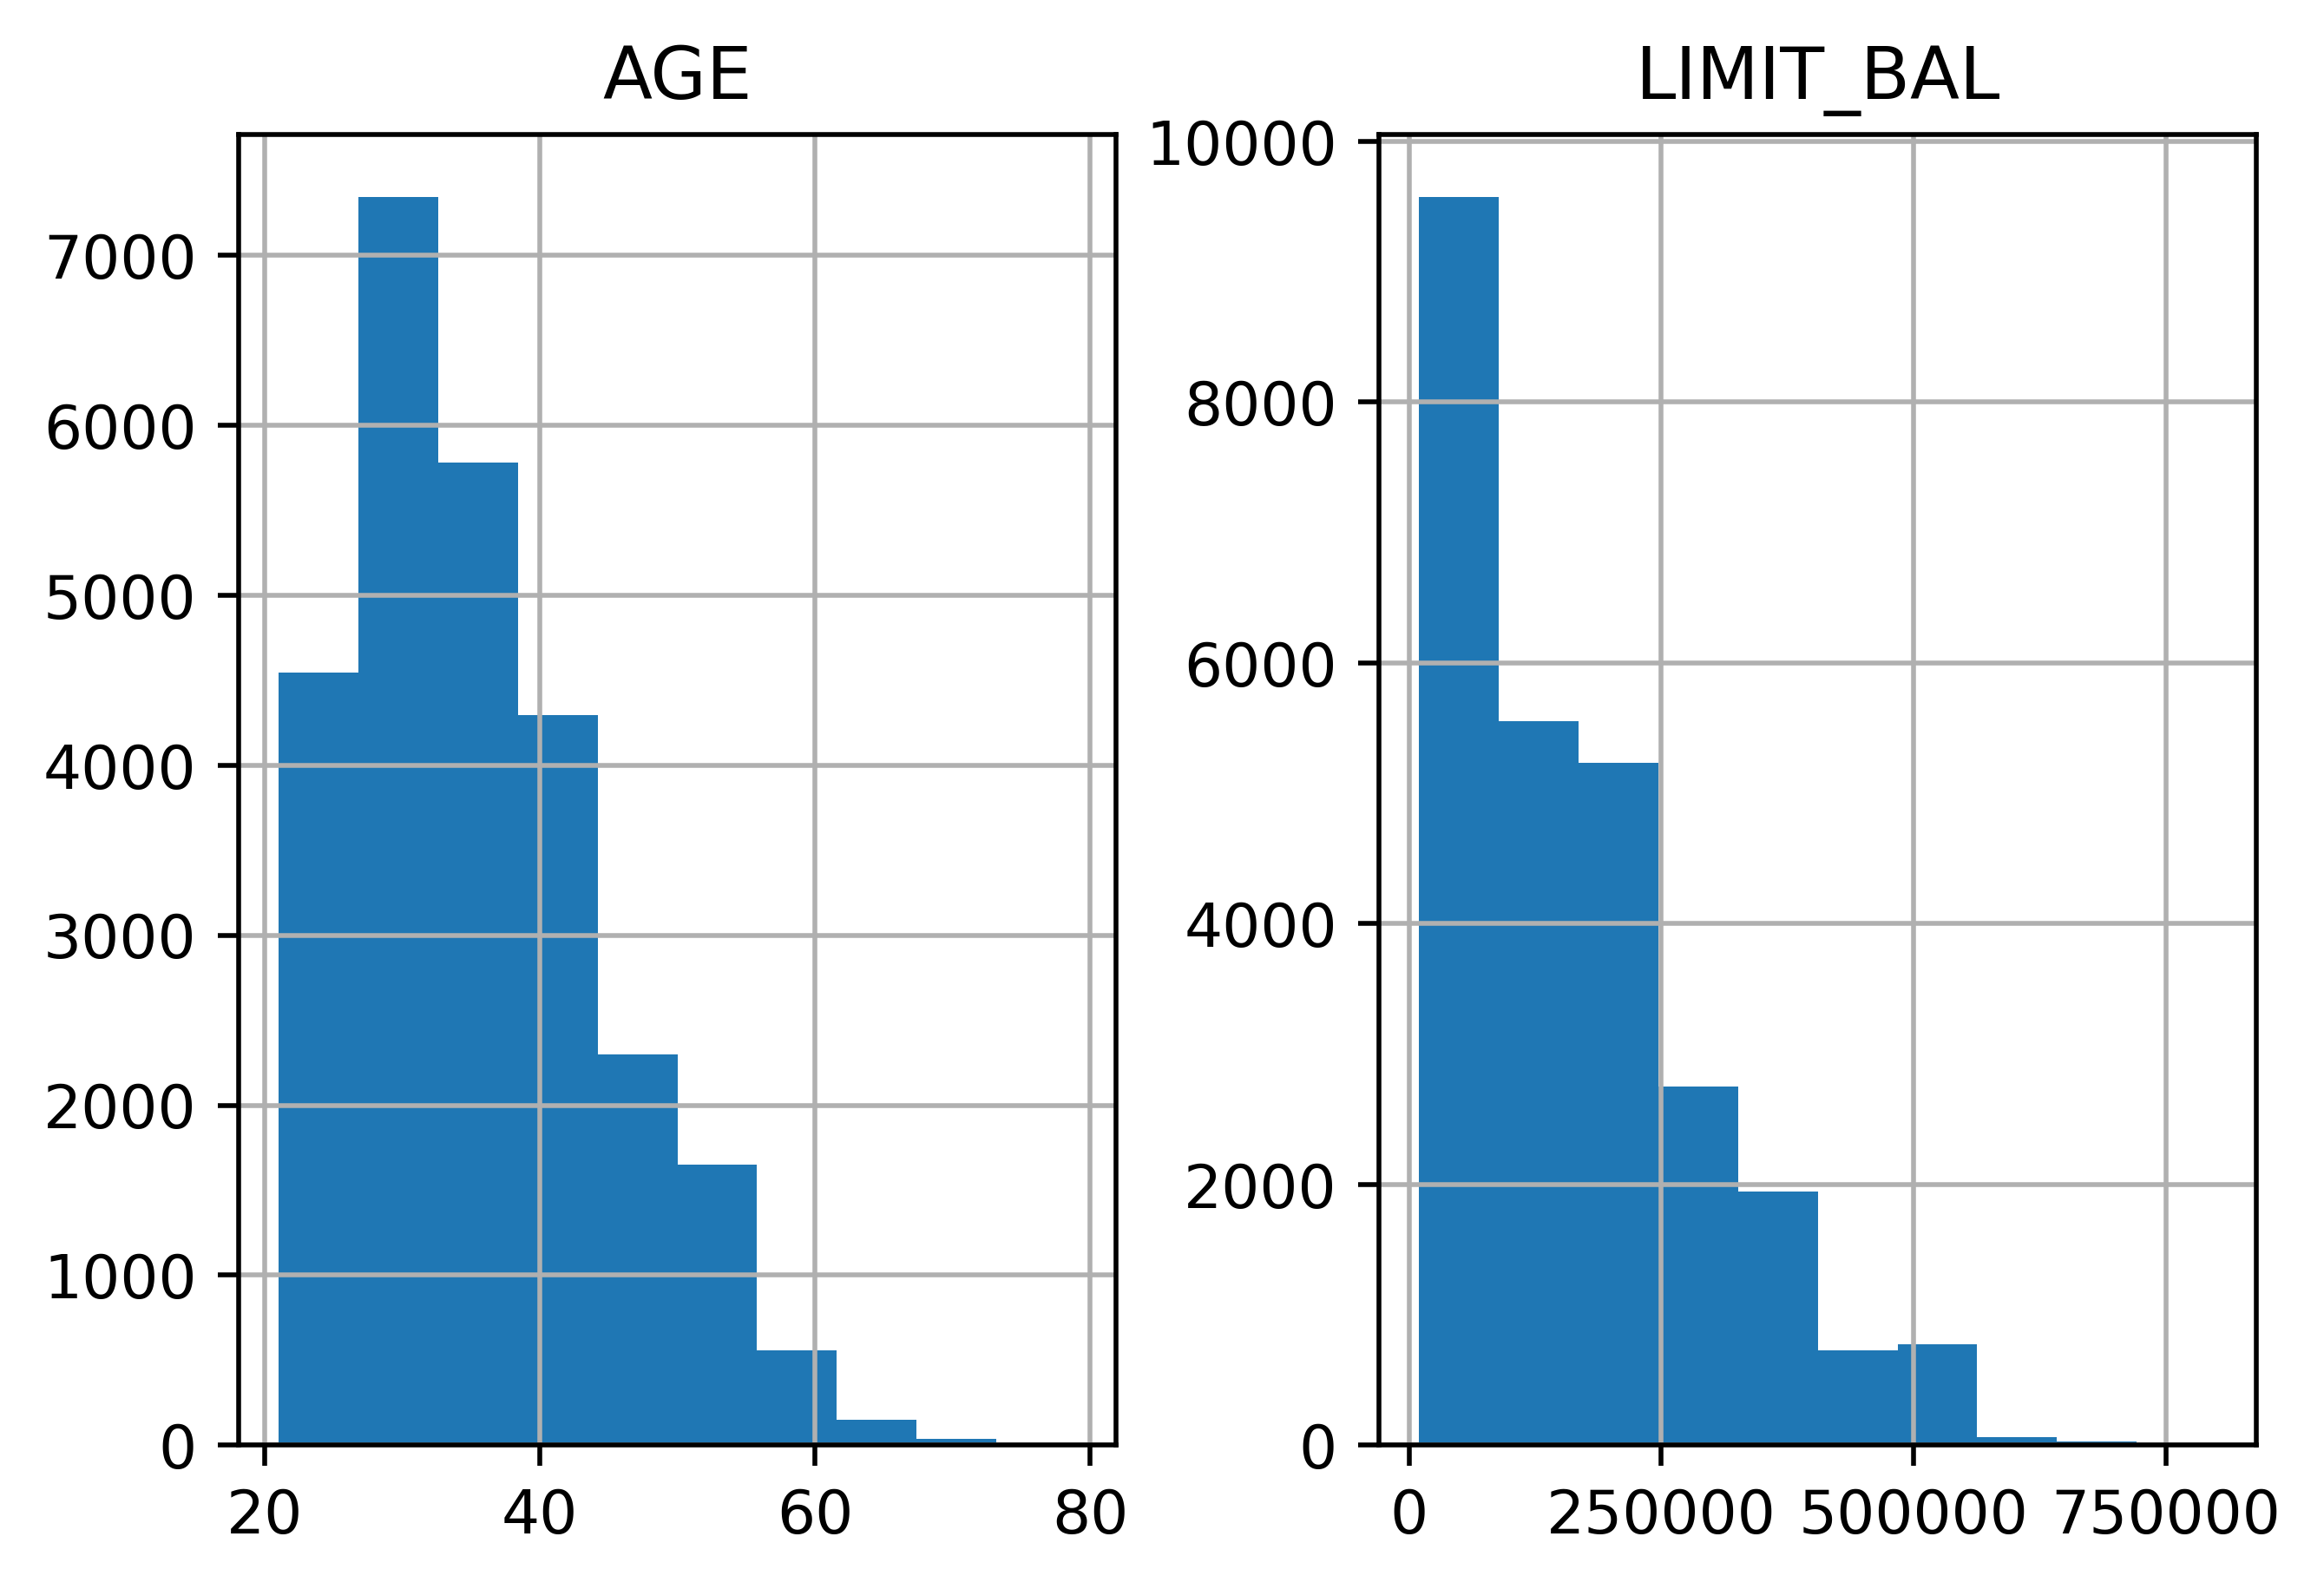

In [35]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000258A0F81B70>,
      dtype=object)

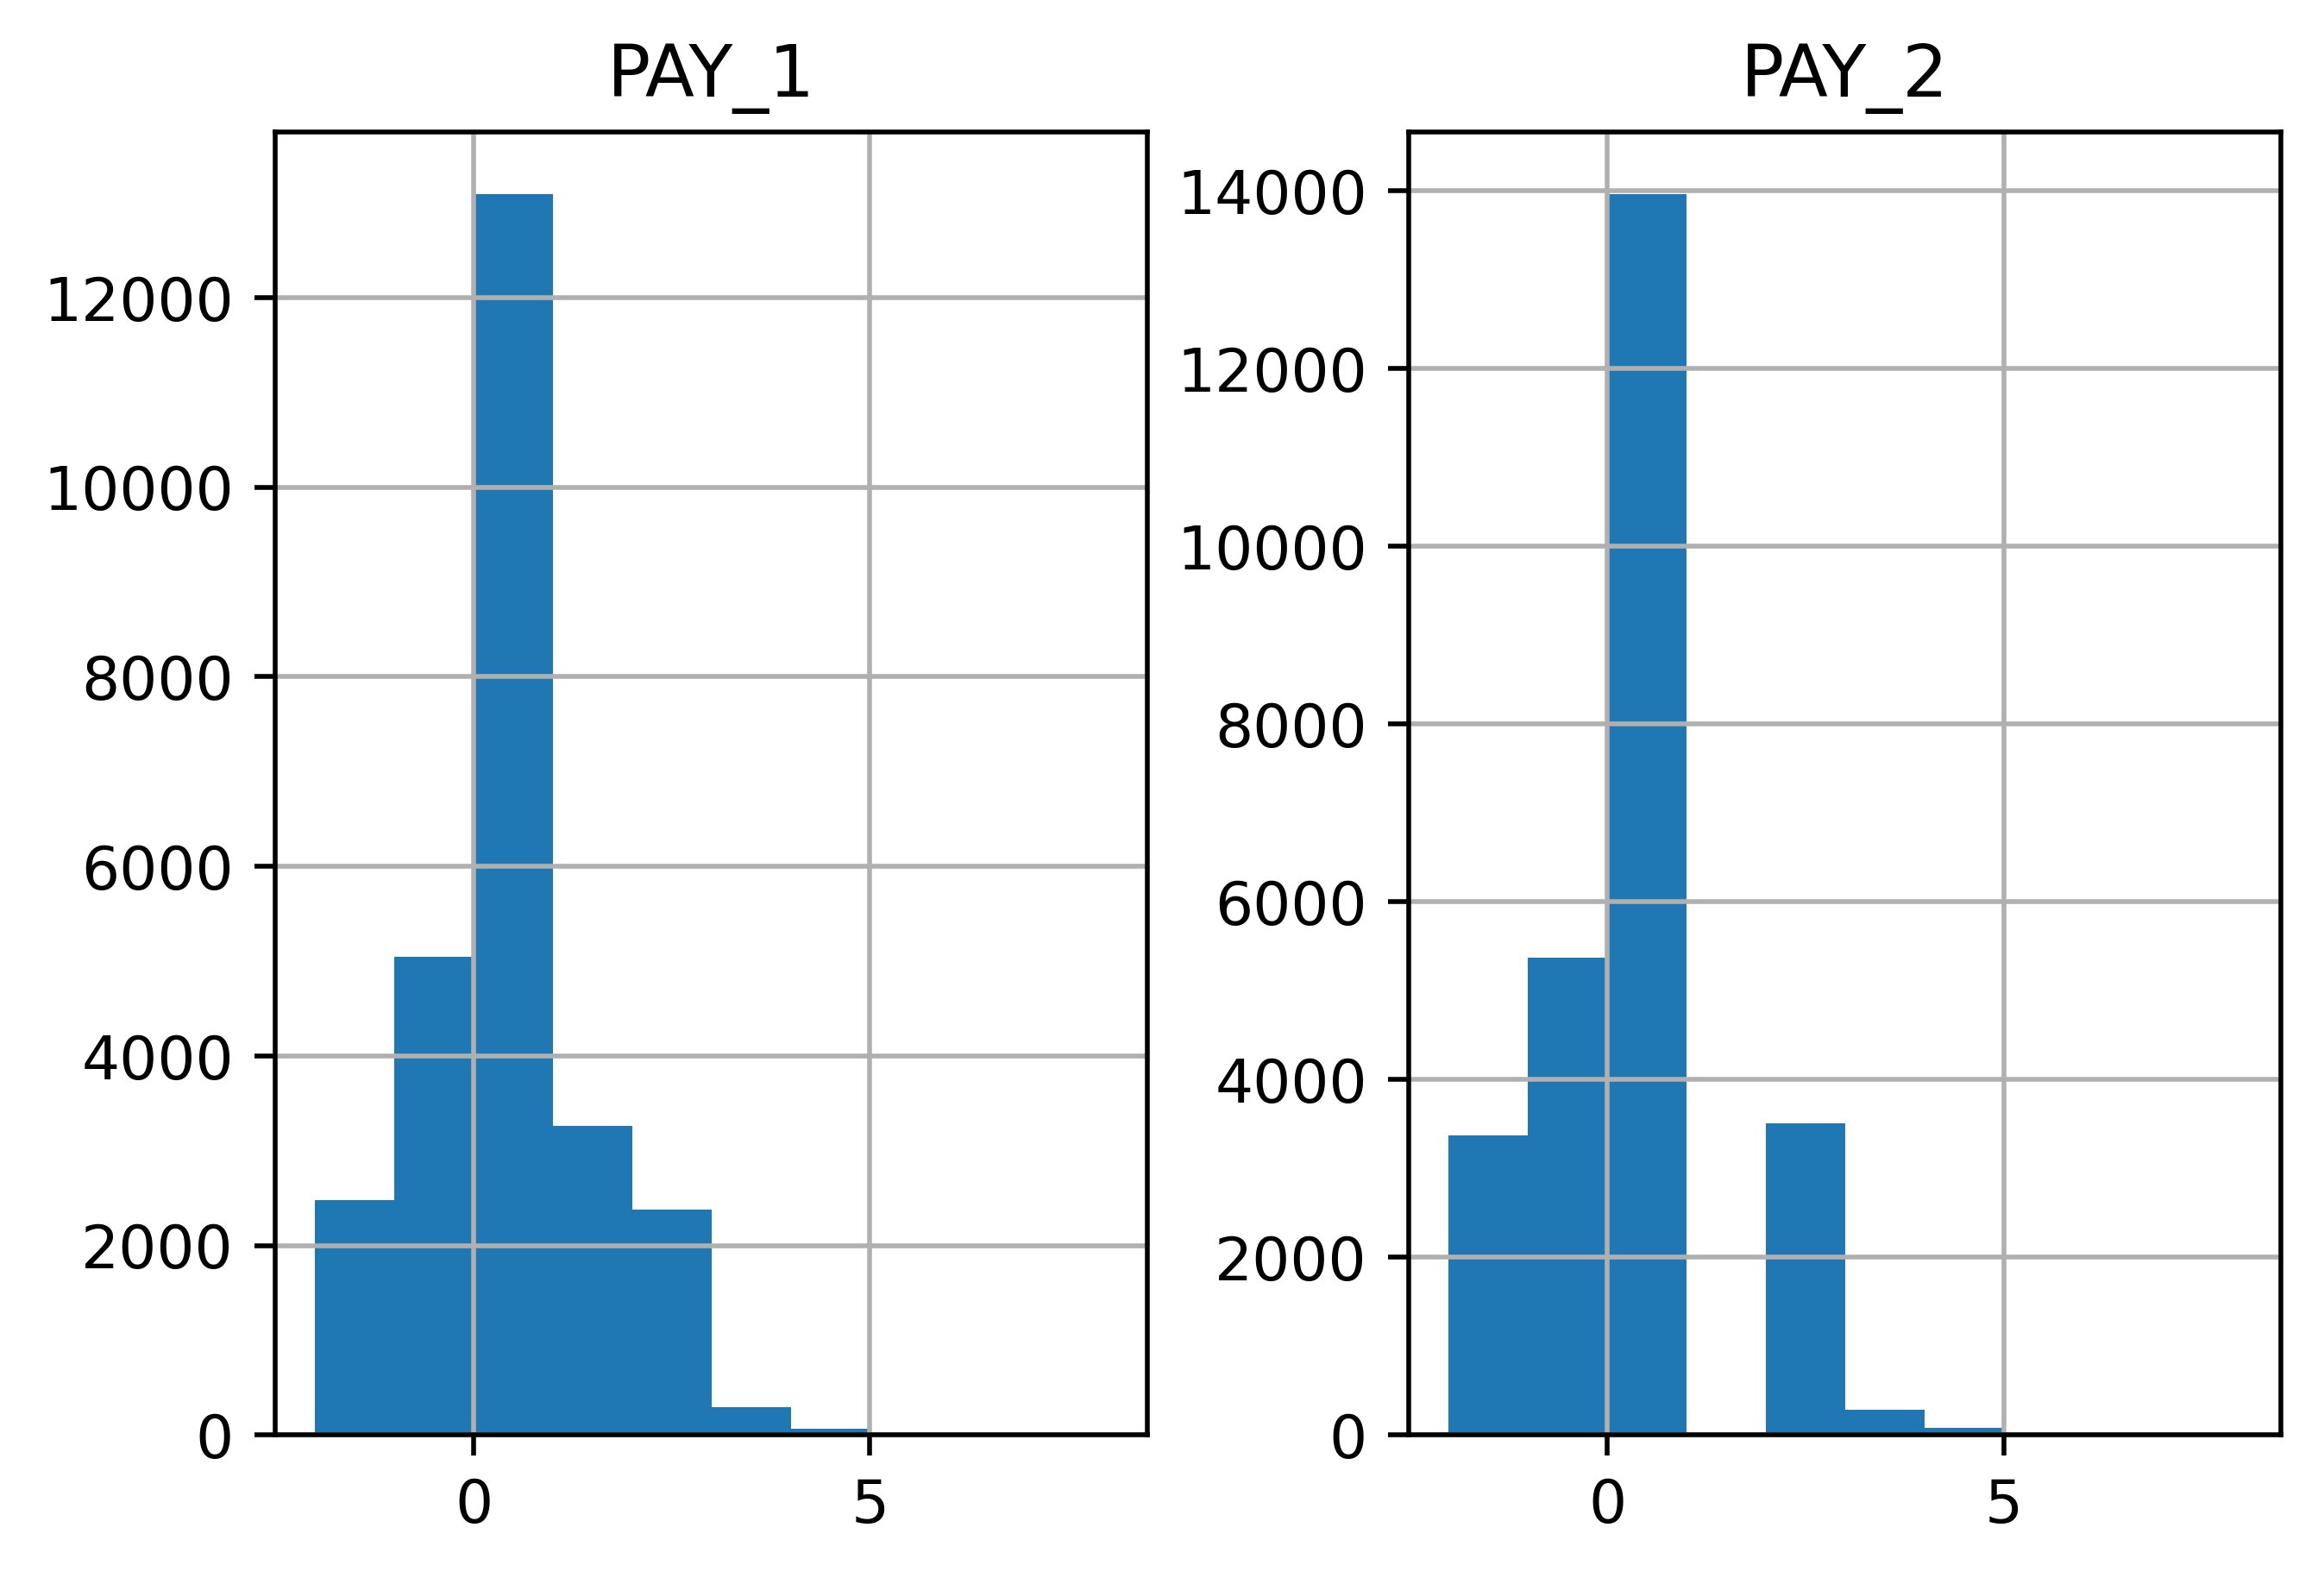

In [36]:
df_clean_2[['PAY_1', 'PAY_2']].hist()

In [37]:
df_clean_2[['LIMIT_BAL', 'AGE','PAY_1','PAY_2']].describe()

,LIMIT_BAL,AGE,PAY_1,PAY_2
count,26664.000000,26664.000000,26664.000000,26664.000000
mean,167919.054905,35.505213,-0.017777,-0.133363
std,129839.453081,9.227442,1.126769,1.198640
min,10000.000000,21.000000,-2.000000,-2.000000
25%,50000.000000,28.000000,-1.000000,-1.000000
50%,140000.000000,34.000000,0.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000
max,800000.000000,79.000000,8.000000,8.000000


In [38]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [39]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [40]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [41]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

Text(0.5, 0, 'Education level: ordinal encoding')

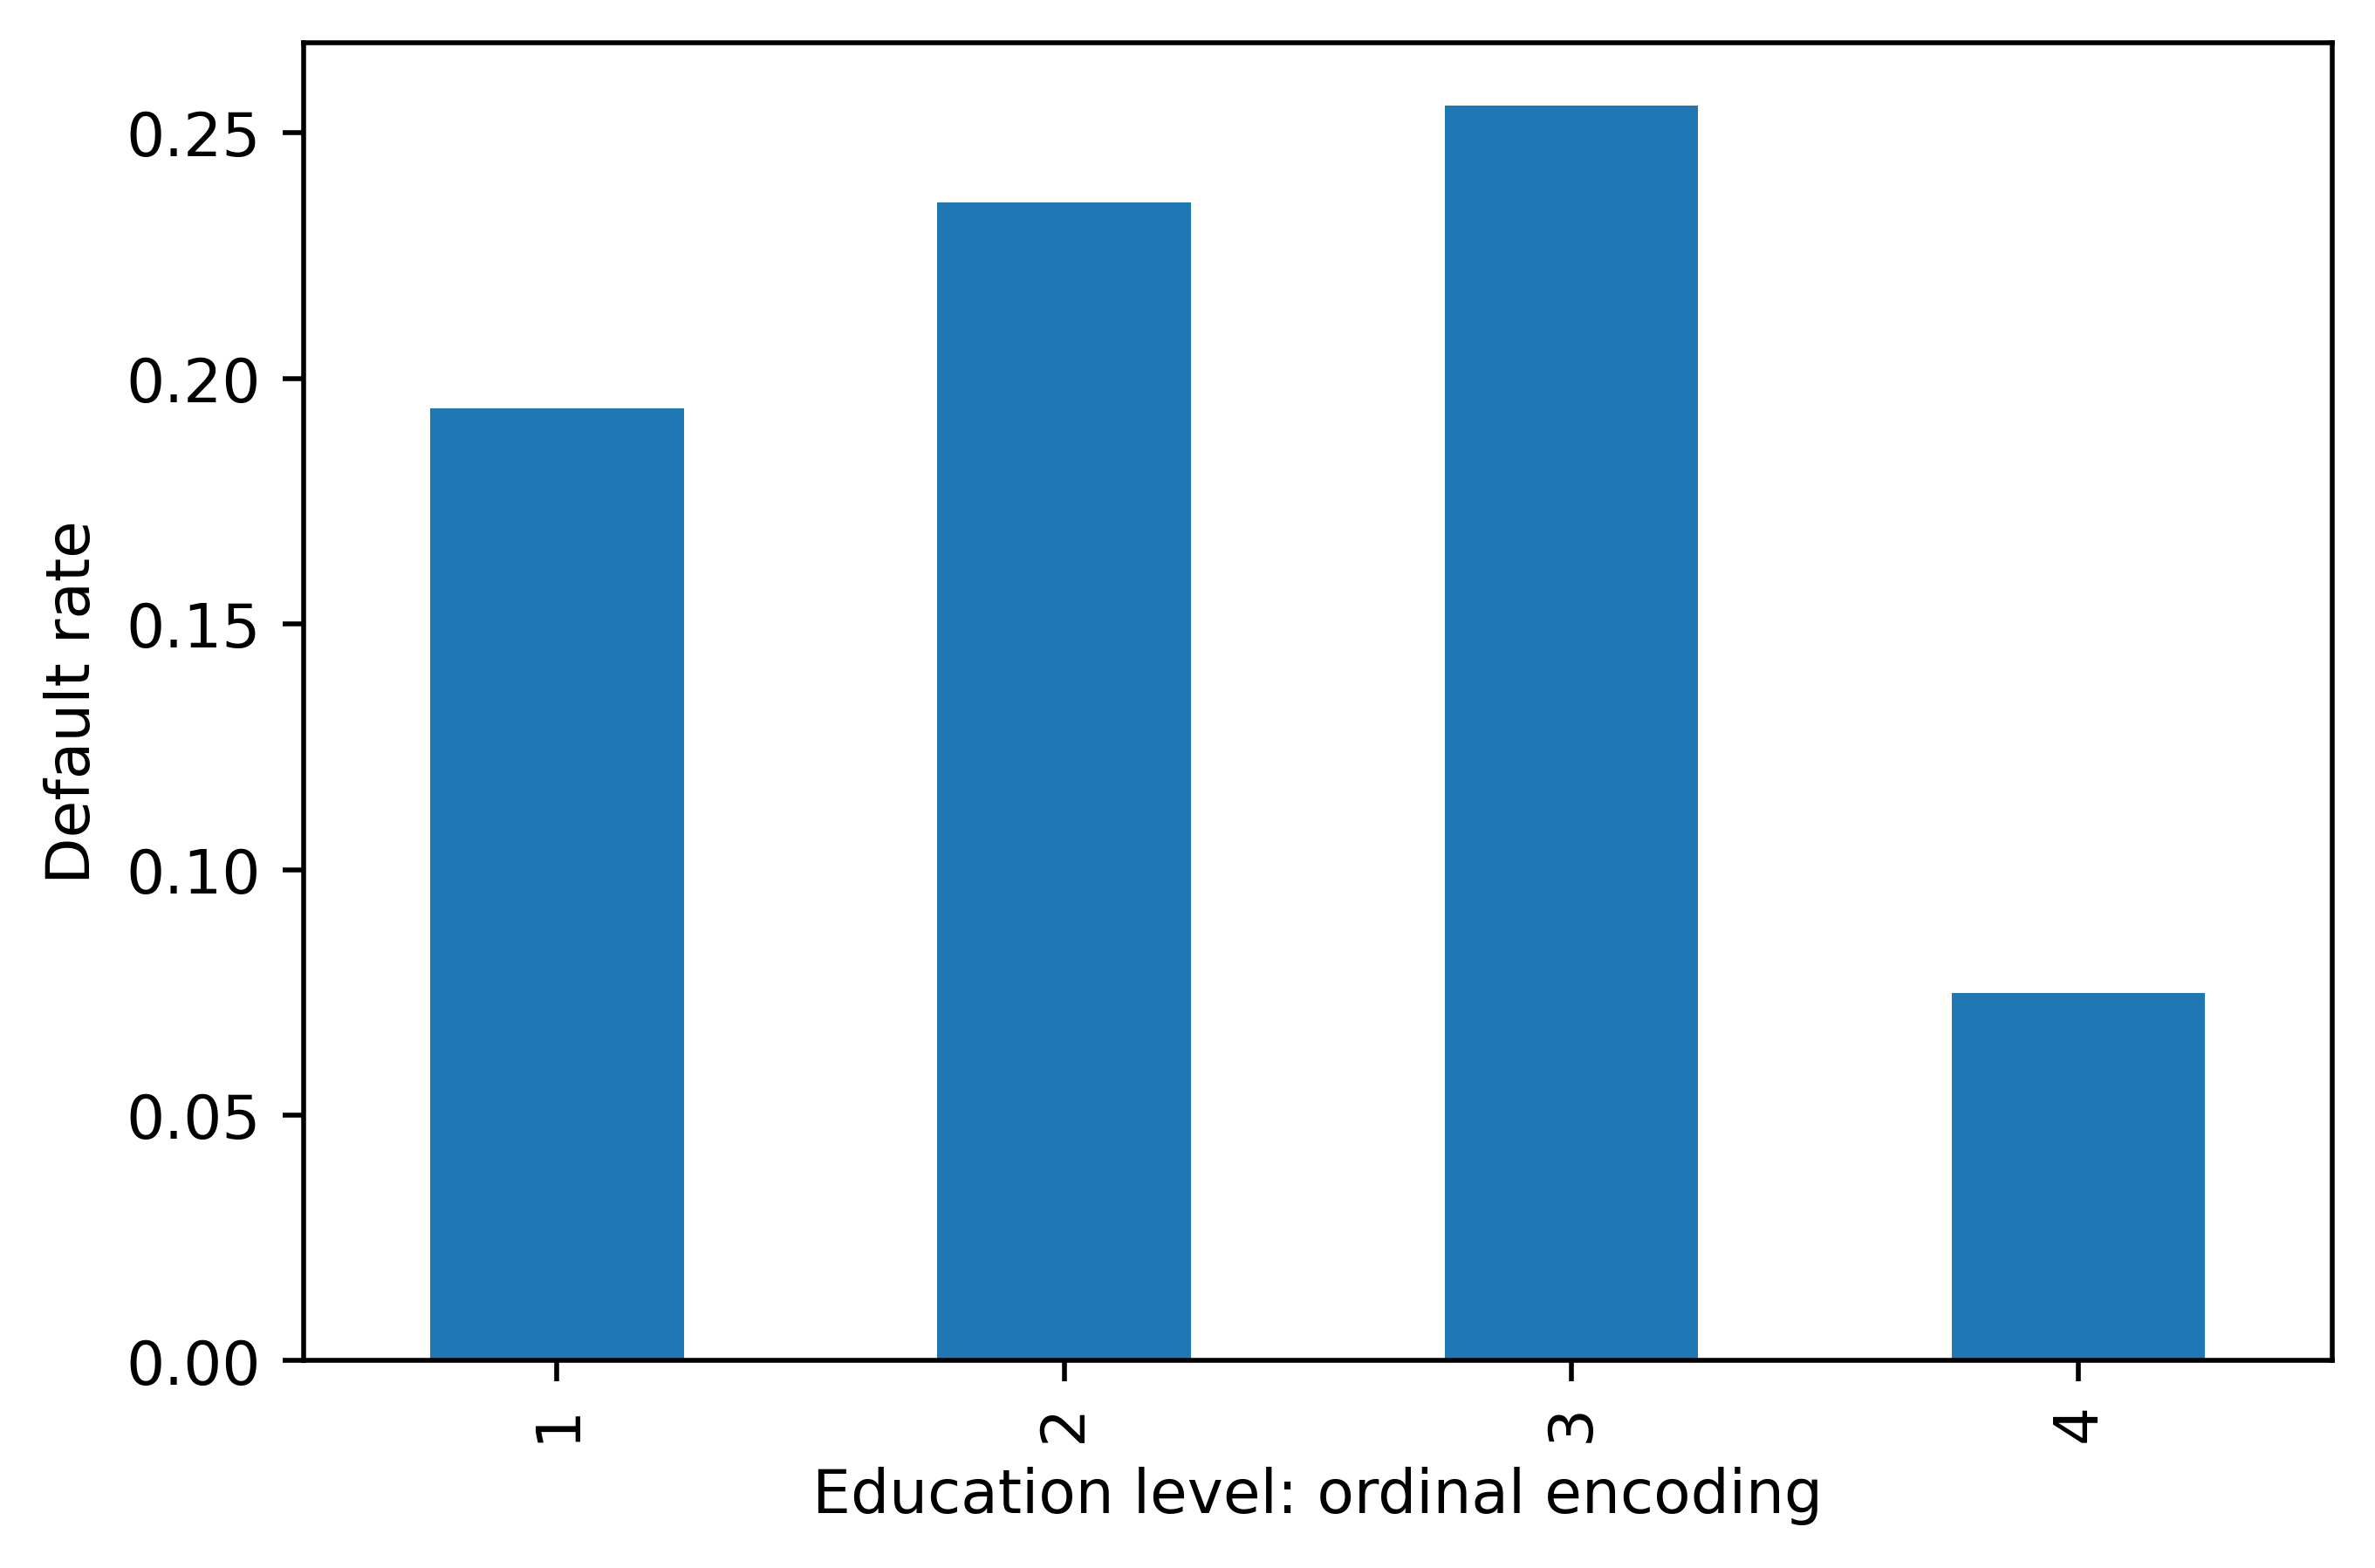

In [42]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

In [43]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [44]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [45]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [46]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [47]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [51]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [50]:
df_with_ohe.to_csv('cleaned_data.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'cleaned_data.csv'

In [52]:
df = pd.read_csv('cleaned_data.csv')

In [53]:
df.shape

(26664, 30)

In [54]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [55]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [56]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [57]:
pay_feats

['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [58]:
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [59]:
df[pay_feats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
 2   PAY_3   26664 non-null  int64
 3   PAY_4   26664 non-null  int64
 4   PAY_5   26664 non-null  int64
 5   PAY_6   26664 non-null  int64
dtypes: int64(6)
memory usage: 1.2 MB


In [60]:
df[pay_feats[0]].value_counts().sort_index()

-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: PAY_1, dtype: int64

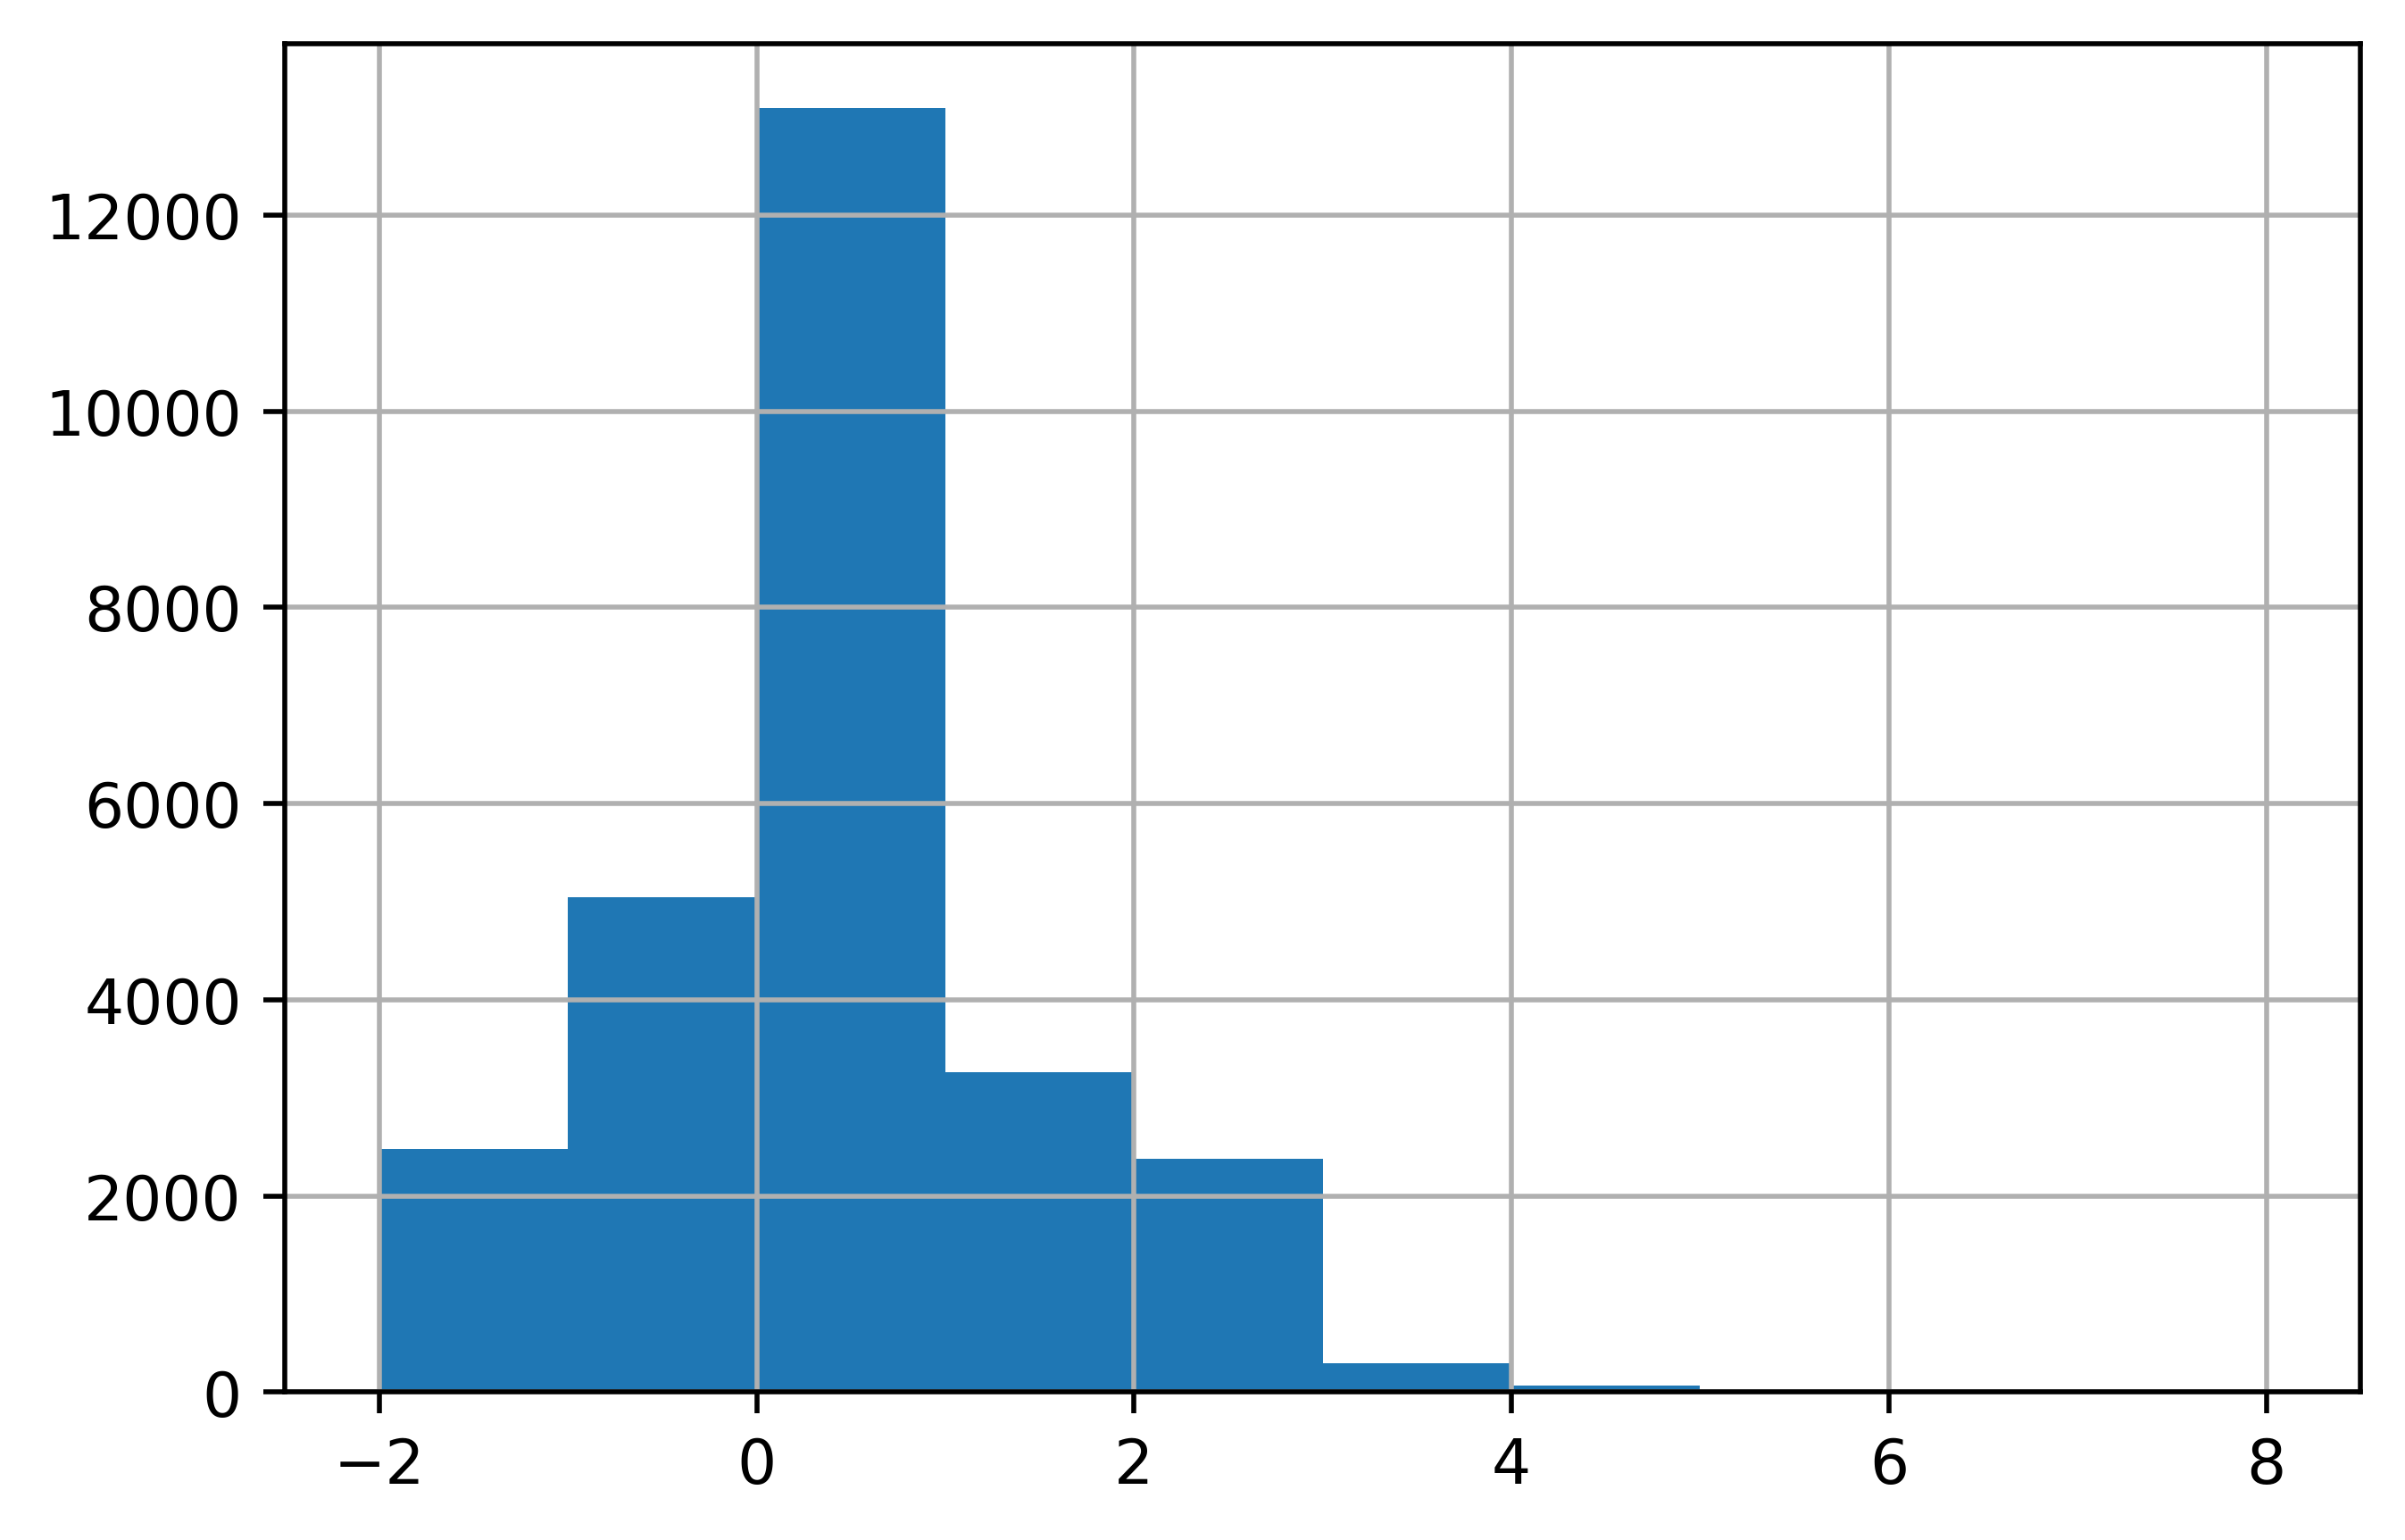

In [61]:
df[pay_feats[0]].hist()

In [62]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

Text(0, 0.5, 'Number of accounts')

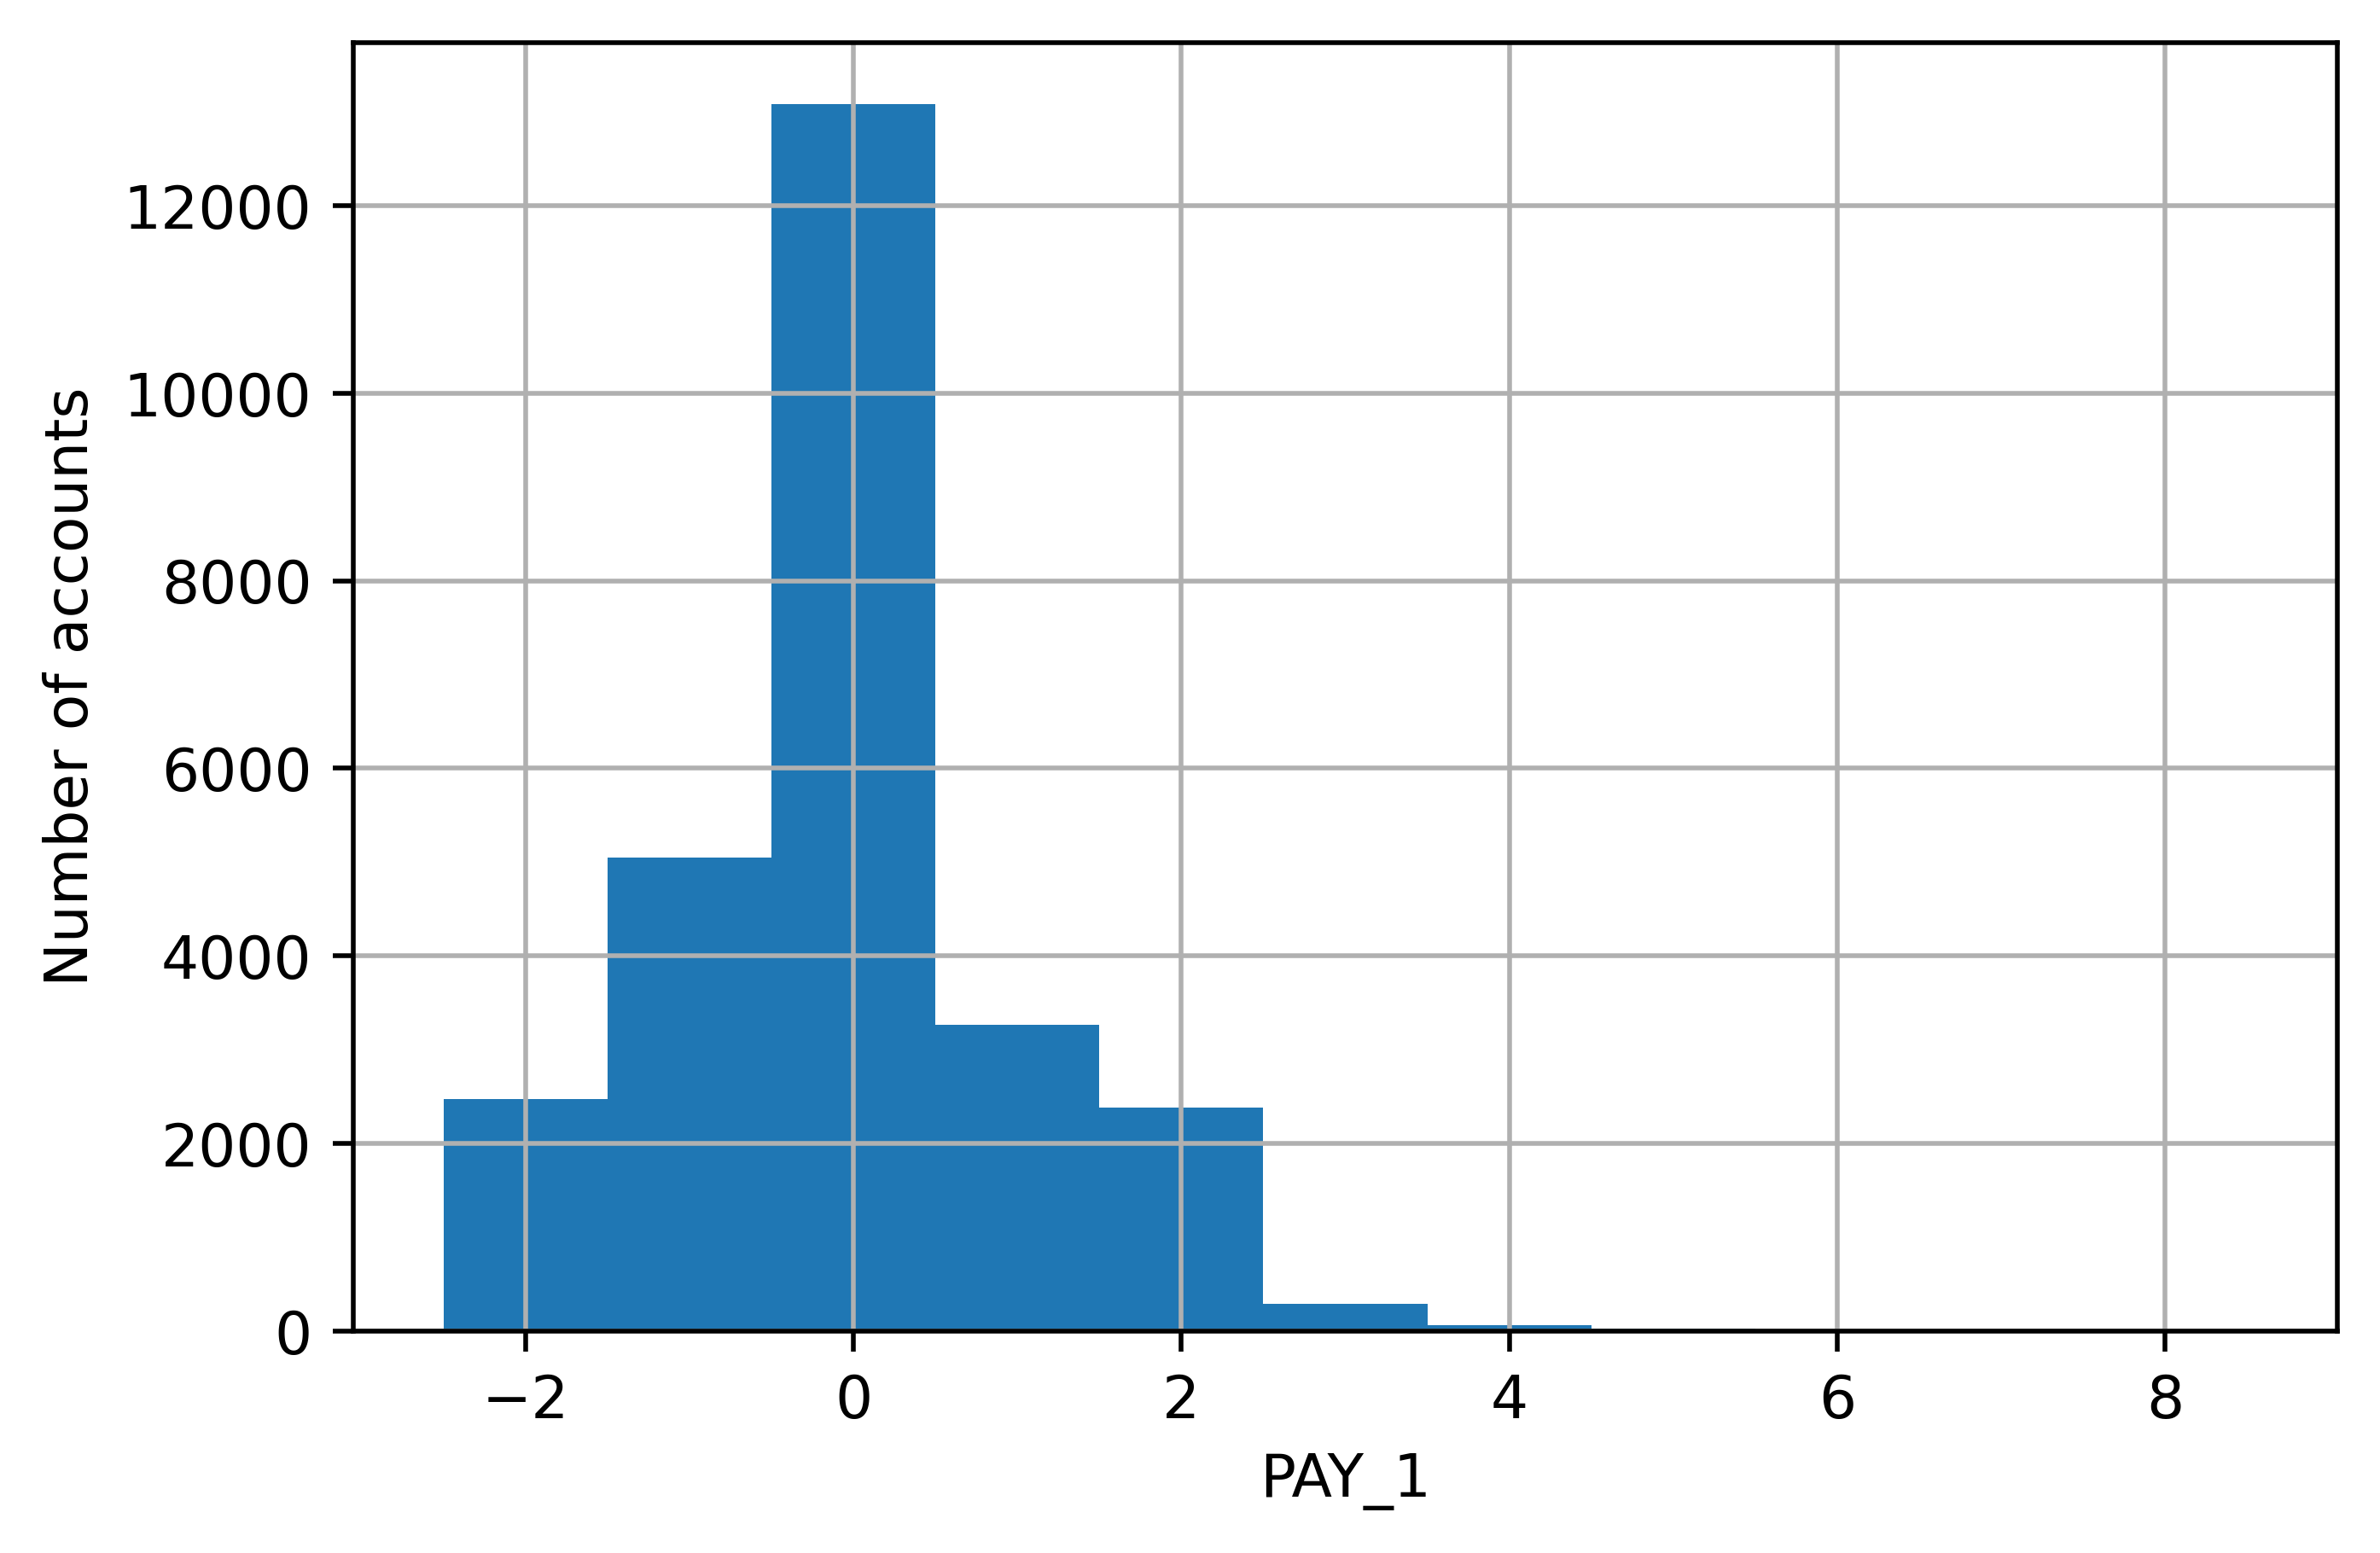

In [63]:
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000258A15E8BE0>,
      dtype=object)

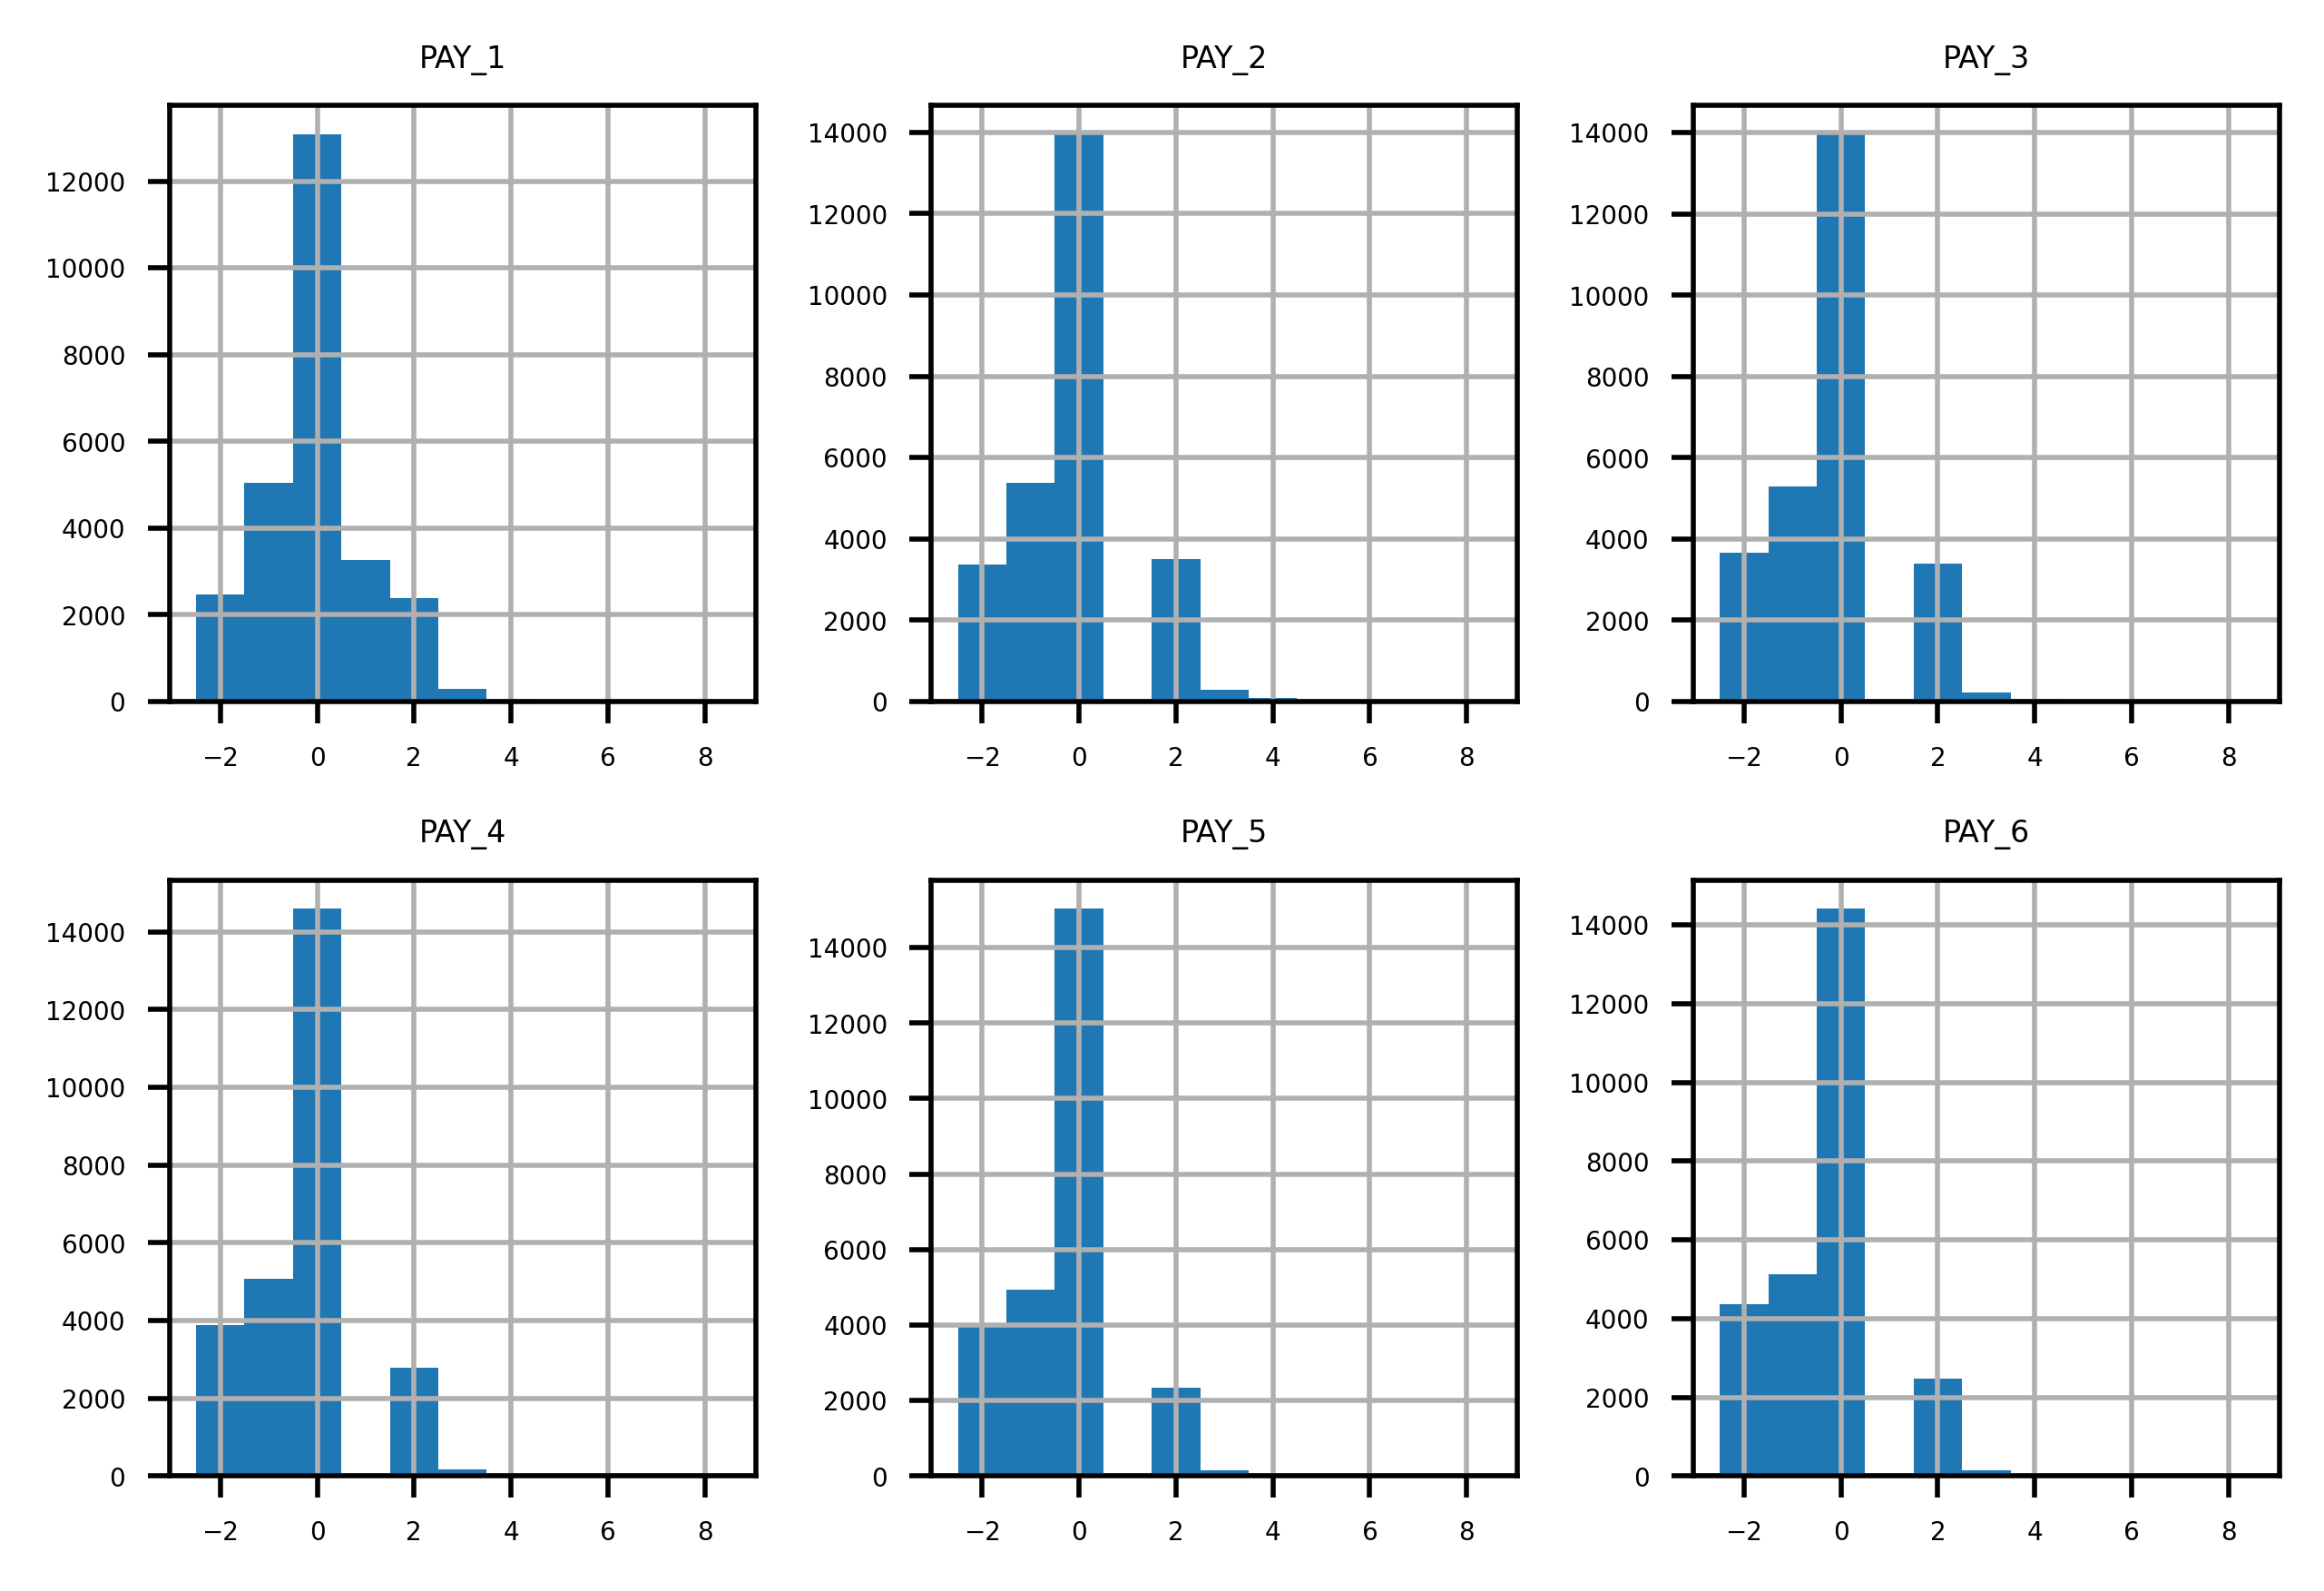

In [64]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [65]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


### TASK 2

In [66]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [84]:
pay_atm_feats = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
bill_feats = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

In [78]:
df[bill_feats].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


In [82]:
df[bill_feats[0]].value_counts().sort_index()

-165580    1
-154973    1
-15308     1
-14386     1
-11545     1
          ..
 613860    1
 621749    1
 630458    1
 653062    1
 746814    1
Name: BILL_AMT1, Length: 20519, dtype: int64

In [79]:
df[bill_feats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   BILL_AMT1  26664 non-null  int64
 1   BILL_AMT2  26664 non-null  int64
 2   BILL_AMT3  26664 non-null  int64
 3   BILL_AMT4  26664 non-null  int64
 4   BILL_AMT5  26664 non-null  int64
 5   BILL_AMT6  26664 non-null  int64
dtypes: int64(6)
memory usage: 1.2 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000258A04EA1D0>,
      dtype=object)

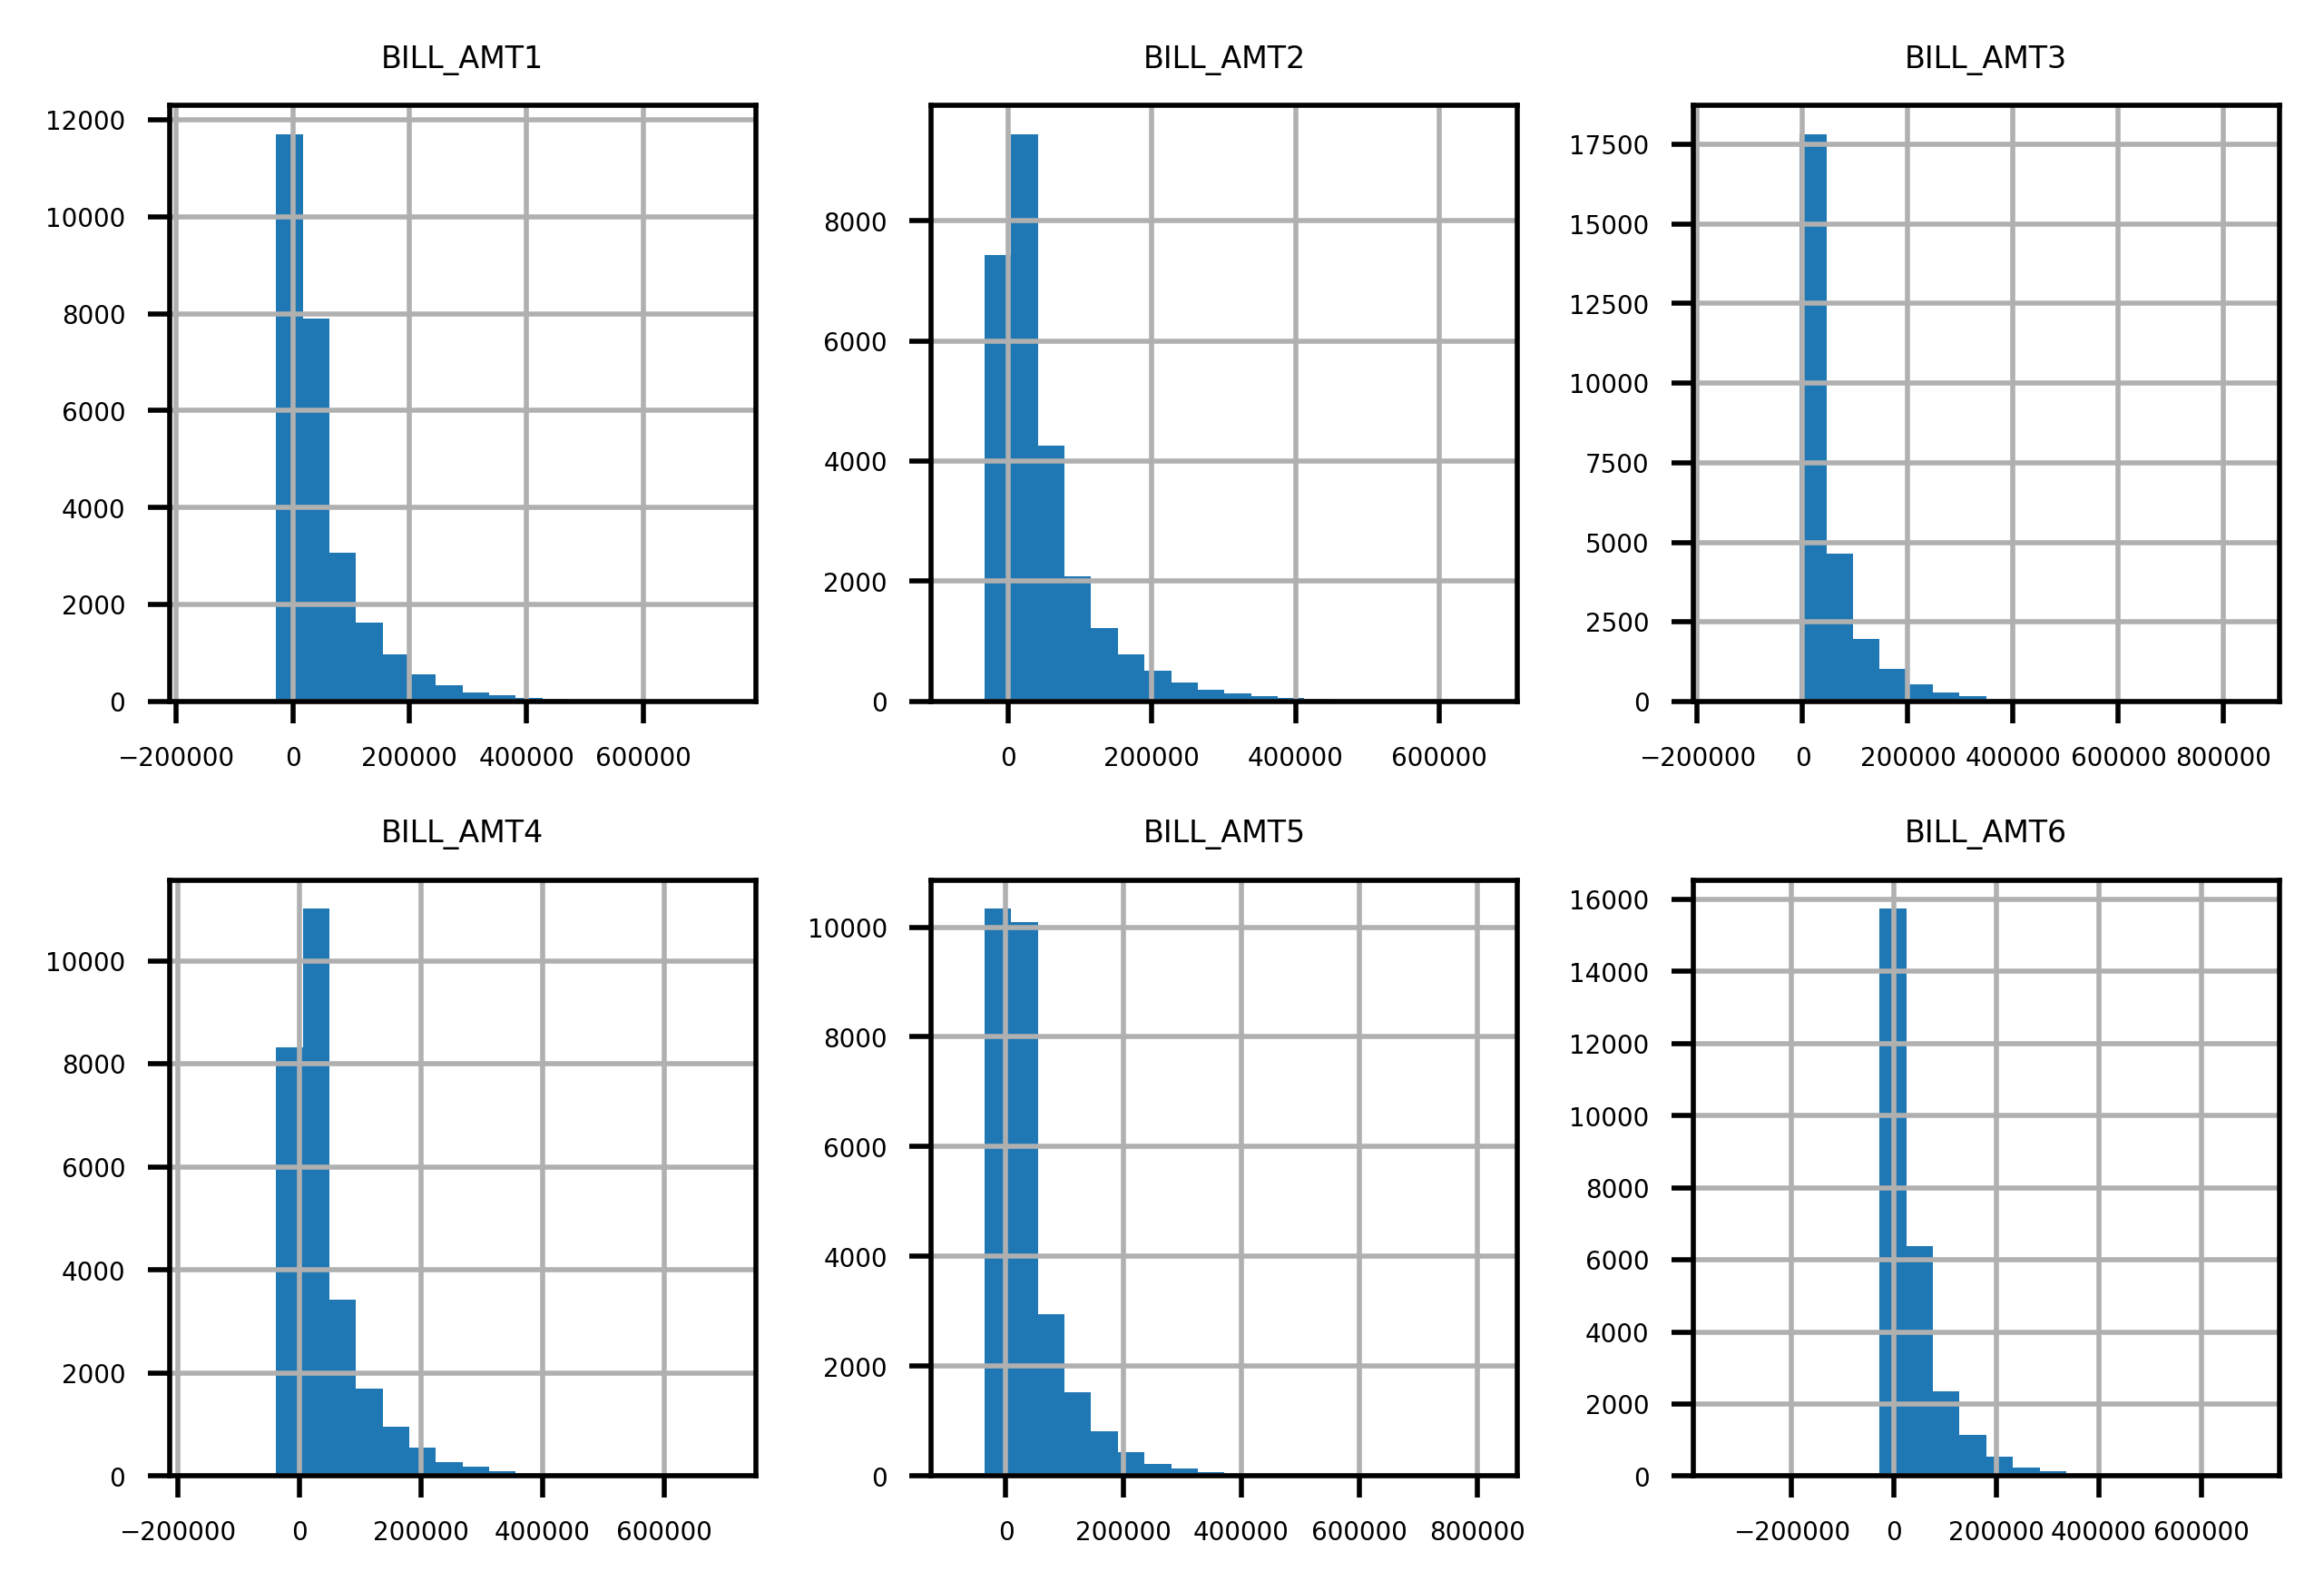

In [80]:
df[bill_feats].hist(bins=20, layout=(2,3))

In [85]:
df[pay_atm_feats].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


In [86]:
df[pay_atm_feats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PAY_AMT1  26664 non-null  int64
 1   PAY_AMT2  26664 non-null  int64
 2   PAY_AMT3  26664 non-null  int64
 3   PAY_AMT4  26664 non-null  int64
 4   PAY_AMT5  26664 non-null  int64
 5   PAY_AMT6  26664 non-null  int64
dtypes: int64(6)
memory usage: 1.2 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000258A7A68E80>,
      dtype=object)

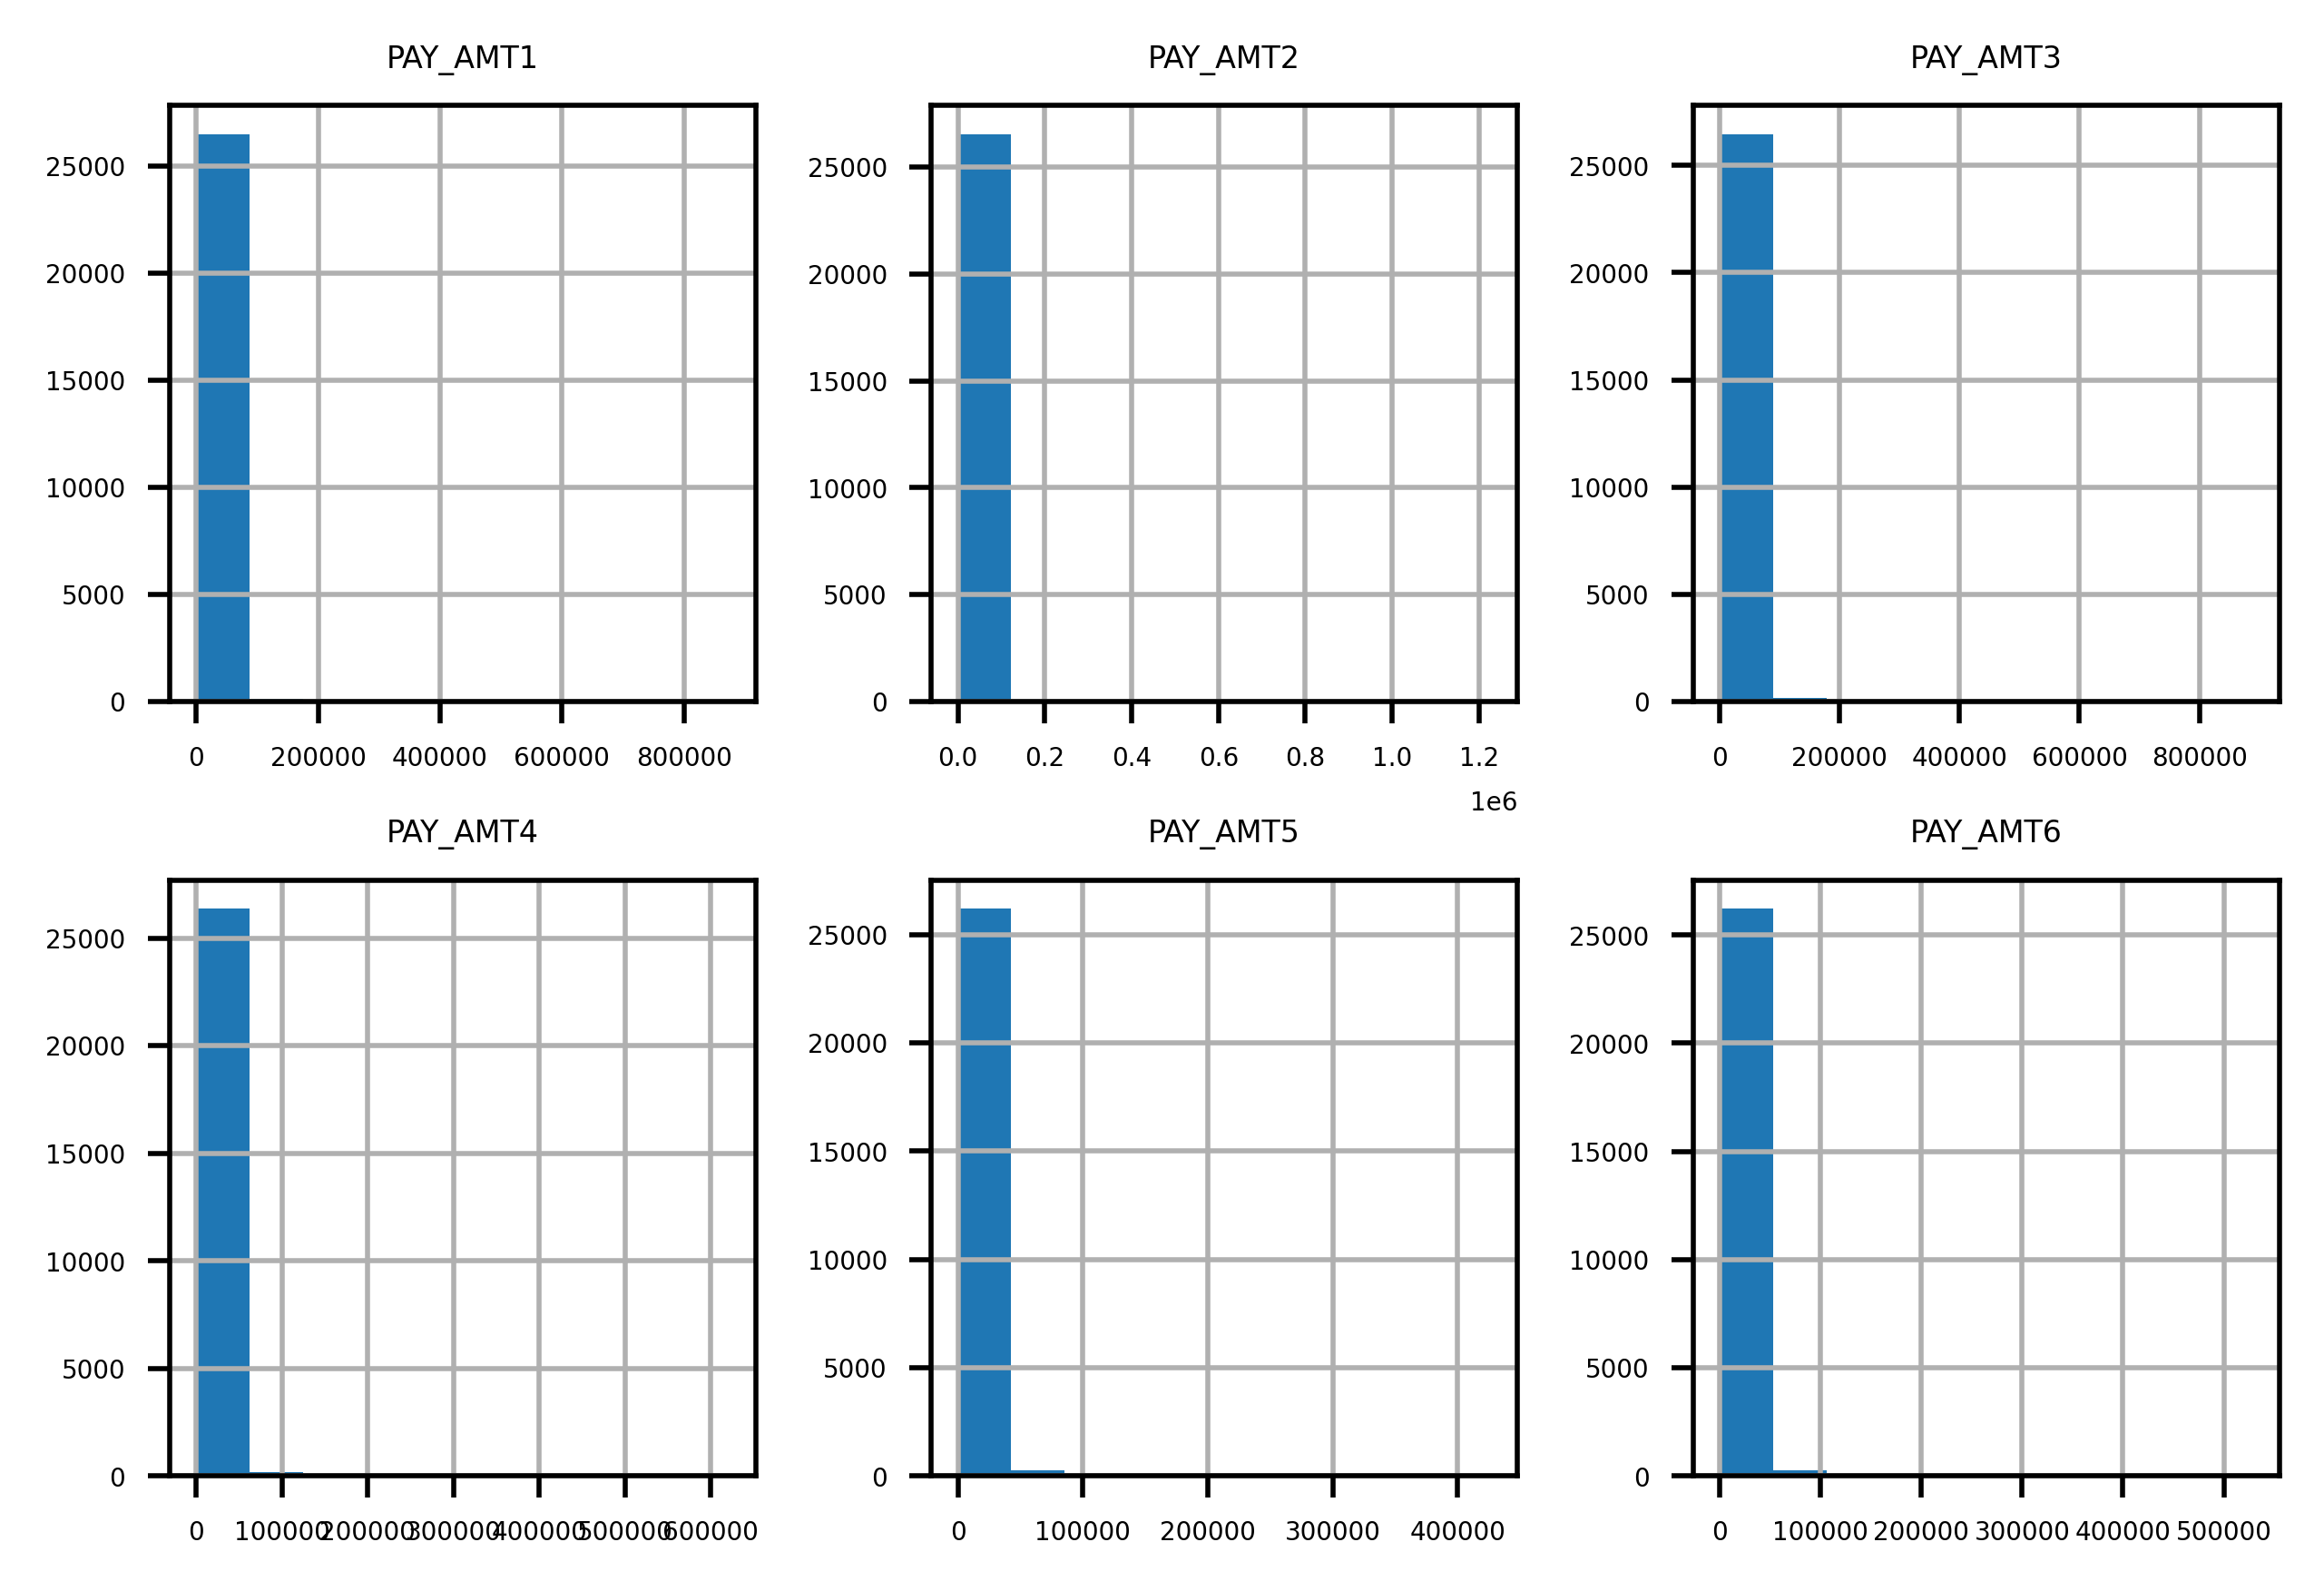

In [90]:
df[pay_atm_feats].hist(layout=(2,3))

In [91]:
pay_zero_mask = df[pay_atm_feats] == 0

In [92]:
pay_zero_mask.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [93]:
pay_zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000258A80FBC18>,
      dtype=object)

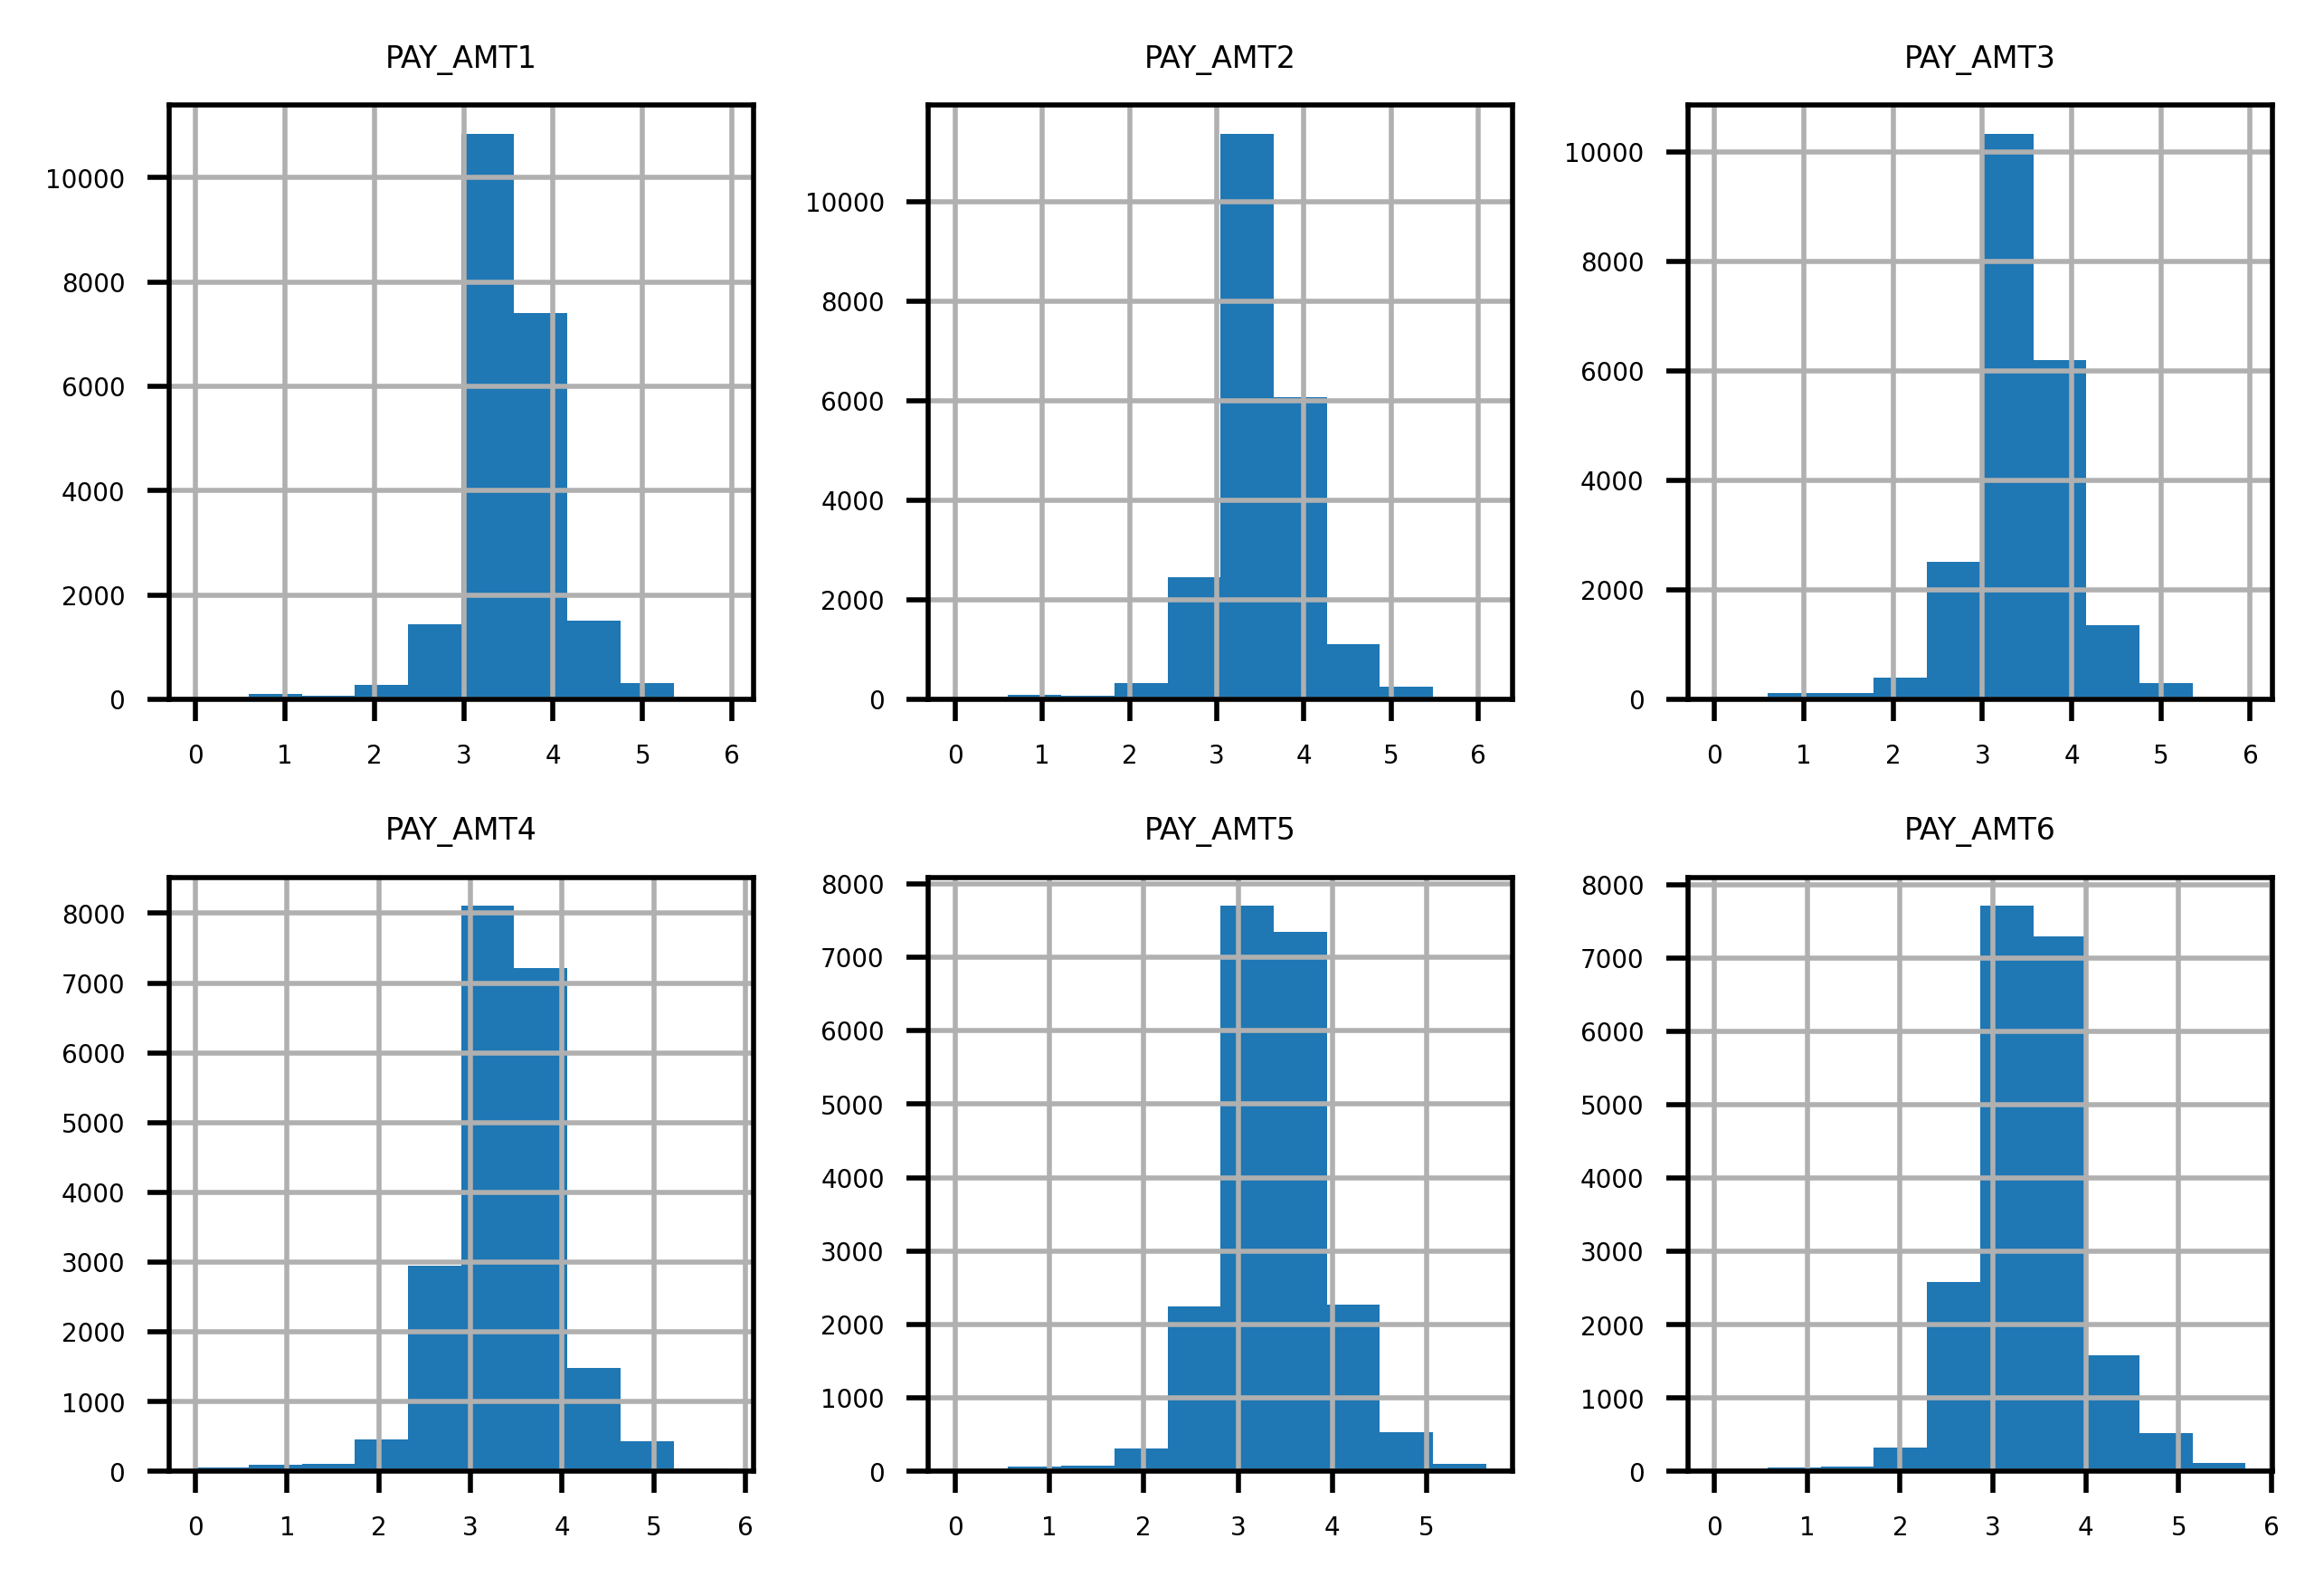

In [95]:
df[pay_atm_feats][~pay_zero_mask].apply(np.log10).hist(layout=(2,3))